In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/globalterrorismdb_0718dist.csv", sep=",",encoding="latin-1")
df.head()

C:\Users\xswer\AppData\Local\Temp\ipykernel_3180\3619614341.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/globalterrorismdb_0718dist.csv", sep=",",encoding="latin-1")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# 1번 문제

In [9]:
df_1 = df[["iyear", "imonth", "iday", "country_txt", "nkill", "nwound"]]
df_1

,iyear,imonth,iday,country_txt,nkill,nwound
0,1970,7,2,Dominican Republic,1.0,0.0
1,1970,0,0,Mexico,0.0,0.0
2,1970,1,0,Philippines,1.0,0.0
3,1970,1,0,Greece,NaN,NaN
4,1970,1,0,Japan,NaN,NaN
...,...,...,...,...,...,...
181686,2017,12,31,Somalia,1.0,2.0
181687,2017,12,31,Syria,2.0,7.0
181688,2017,12,31,Philippines,0.0,0.0
181689,2017,12,31,India,0.0,0.0


In [14]:
df_1 = df_1.rename(columns={"iyear":"Year", "imonth":"Month", "iday" : "Day", "country_txt":"County", "nkill":"Killed", "nwound":"Wounded"})
df_1

,Year,Month,Day,County,Killed,Wounded
0,1970,7,2,Dominican Republic,1.0,0.0
1,1970,0,0,Mexico,0.0,0.0
2,1970,1,0,Philippines,1.0,0.0
3,1970,1,0,Greece,NaN,NaN
4,1970,1,0,Japan,NaN,NaN
...,...,...,...,...,...,...
181686,2017,12,31,Somalia,1.0,2.0
181687,2017,12,31,Syria,2.0,7.0
181688,2017,12,31,Philippines,0.0,0.0
181689,2017,12,31,India,0.0,0.0


In [15]:
df_1.index

RangeIndex(start=0, stop=181691, step=1)

In [16]:
sns.color_palette("dark", 5)

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076)]

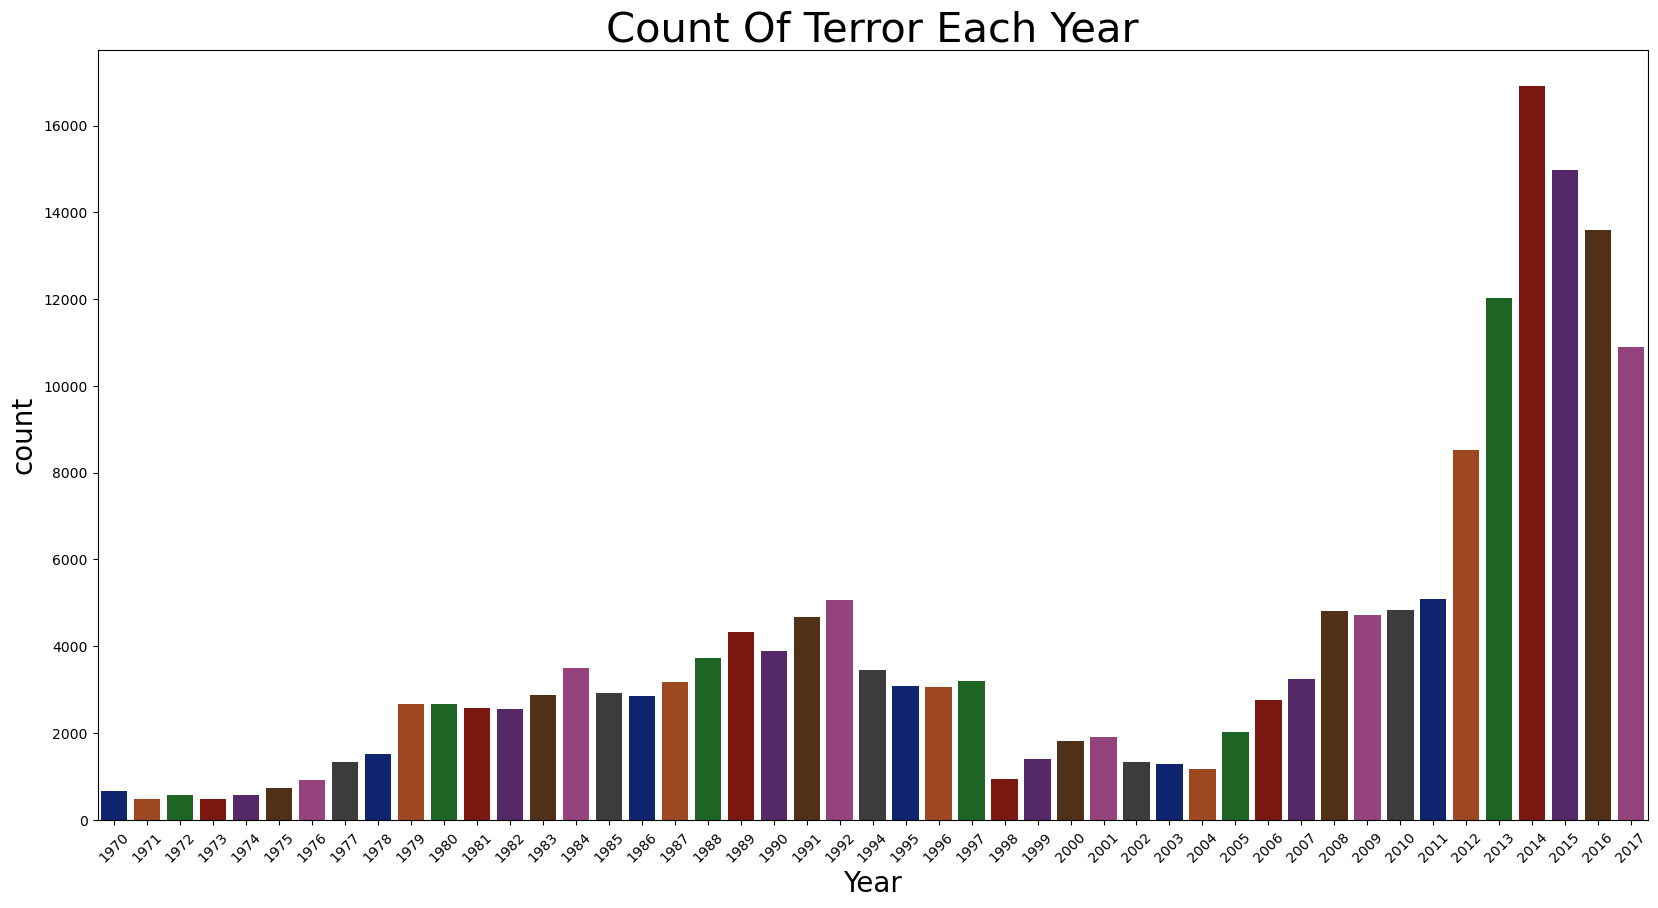

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_1, x = "Year", palette=sns.color_palette("dark", 8))
plt.xticks(rotation = 45)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("count", fontsize = 20)
plt.title("Count Of Terror Each Year", fontsize = 30)
plt.show()

## 연도별 테러 발생 빈도
- 테러 발생 중 2013~2014년이 가장 큰 발생 빈도를 보임
- 추정 원인으로 이랍, 파키스탄에서 2852, 2212 등 발생빈도를 보이며 당시 종교적 원인으로 테러 사건이 자주 발생한 것으로 추정
- 또한, 탈레반, IS 등 단체에서 발생시킨 테러 사건 빈도가 2718, 1868 등으로 2013~2014년 종교적 원인으로 테러가 발생한 것으로 추정

In [18]:
df_1 = df_1.groupby("Year").agg({"Killed" : ["count", "sum"], "Wounded" : ["count", "sum"]})
df_1

Killed          Wounded         
      count      sum   count      sum
Year                                 
1970    609    174.0     599    212.0
1971    407    173.0     326     82.0
1972    524    566.0     241    409.0
1973    424    370.0     244    495.0
1974    523    539.0     352    865.0
1975    587    617.0     400    617.0
1976    814    674.0     620    756.0
1977   1189    456.0    1104    518.0
1978   1373   1459.0    1331   1600.0
1979   2257   2100.0    2200   2506.0
1980   2211   4400.0    2150   3645.0
1981   1928   4851.0    1883   3337.0
1982   1742   5136.0    1666   3342.0
1983   1974   9444.0    1829   4047.0
1984   2805  10450.0    2775   5291.0
1985   2475   7094.0    2429   5130.0
1986   2481   4976.0    2427   5814.0
1987   3089   6482.0    3039   5775.0
1988   3689   7208.0    3672   6960.0
1989   4290   8152.0    4290   5539.0
1990   3881   7148.0    3867   6128.0
1991   4579   8429.0    4587   7591.0
1992   5048   9742.0    5036   9915.0
1994   3368   7690.0    3337   7569.0
1995   3076   6103.0    3060  14292.0
1996   3001   6966.0    2948  10795.0
1997   3130  10924.0    3016   9072.0
1998    871   4688.0     791   8183.0
1999   1345   3393.0    1286   5341.0
2000   1757   4403.0    1654   5869.0
2001   1885   7729.0    1798  22774.0
2002   1321   4805.0    1247   7162.0
2003   1258   3317.0    1175   7384.0
2004   1151   5743.0    1050  12022.0
2005   1999   6331.0    1871  12784.0
2006   2673   9380.0    2545  15550.0
2007   3198  12824.0    2993  22524.0
2008   4740   9157.0    4629  18998.0
2009   4703   9273.0    4626  19138.0
2010   4821   7827.0    4797  15947.0
2011   5048   8246.0    4976  14659.0
2012   8314  15497.0    8165  25445.0
2013  11685  22273.0   11454  37688.0
2014  15881  44490.0   15036  41128.0
2015  14160  38853.0   13481  44043.0
2016  12809  34871.0   12437  40001.0
2017  10285  26445.0    9941  24927.0

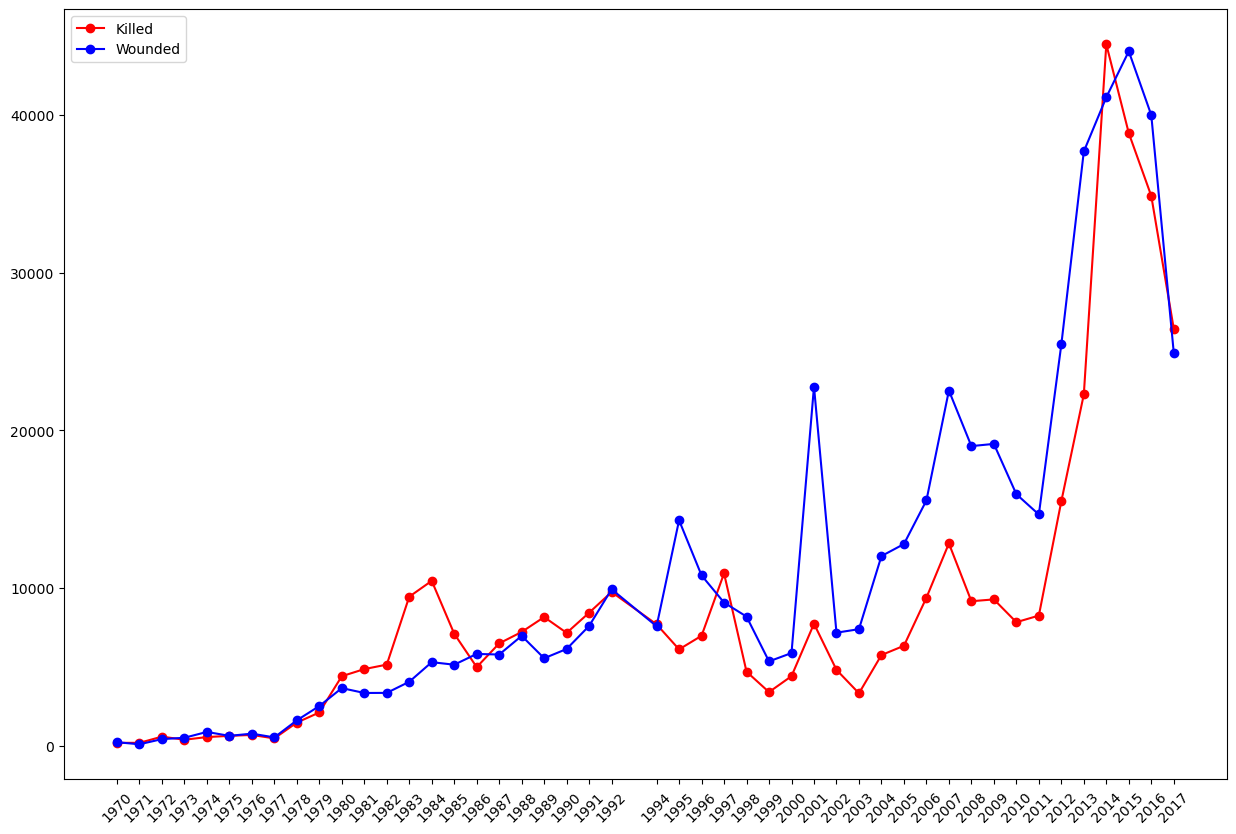

In [19]:
plt.figure(figsize=(15, 10))

plt.plot(df_1.index, df_1["Killed", "sum"], color = "r", marker="o")
plt.plot(df_1.index, df_1["Wounded", "sum"], color = "b", marker="o")
plt.xticks(df_1.index, rotation = 45)
plt.legend(labels = ["Killed", "Wounded"], loc = 'best')
plt.show()

## 연도별 테러 사건의 사망자, 부상자 수치
- 2010년 이후 급격히 늘어난 테러 사건으로 전체적인 사망자, 부상자가 많음
- 전체적인 사망자, 부상자 수는 비슷한 양상을 보이나,
- 1983~1984년 사망자 빈도가 급격히 늘어났으며, 2001년 및 2007년 부상자 수가 사망자 대비 크게 차이가 남
- 해당 원인은 아직 파악하지 못했으며, 이후 연도별 지역, 국가, 월 등 세부적인 데이터 분석으로 파악할 계획

# 2번 문제

In [20]:
df_2 = df[["iyear", "imonth", "iday", "country_txt", "nkill", "nwound"]]
df_2 = df_2.rename(columns={"iyear" : "Year", "iday" : "Day", "country_txt" : "County", "nkill" : "Killed", "nwound" : "Wounded"})
df_2

,Year,imonth,Day,County,Killed,Wounded
0,1970,7,2,Dominican Republic,1.0,0.0
1,1970,0,0,Mexico,0.0,0.0
2,1970,1,0,Philippines,1.0,0.0
3,1970,1,0,Greece,NaN,NaN
4,1970,1,0,Japan,NaN,NaN
...,...,...,...,...,...,...
181686,2017,12,31,Somalia,1.0,2.0
181687,2017,12,31,Syria,2.0,7.0
181688,2017,12,31,Philippines,0.0,0.0
181689,2017,12,31,India,0.0,0.0


# 2번 문제

In [21]:
df_2 = df_2.groupby("County").agg({"Year":"count"}).sort_values(by="Year", ascending=False).head(10)
df_2

,Year
County,
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235


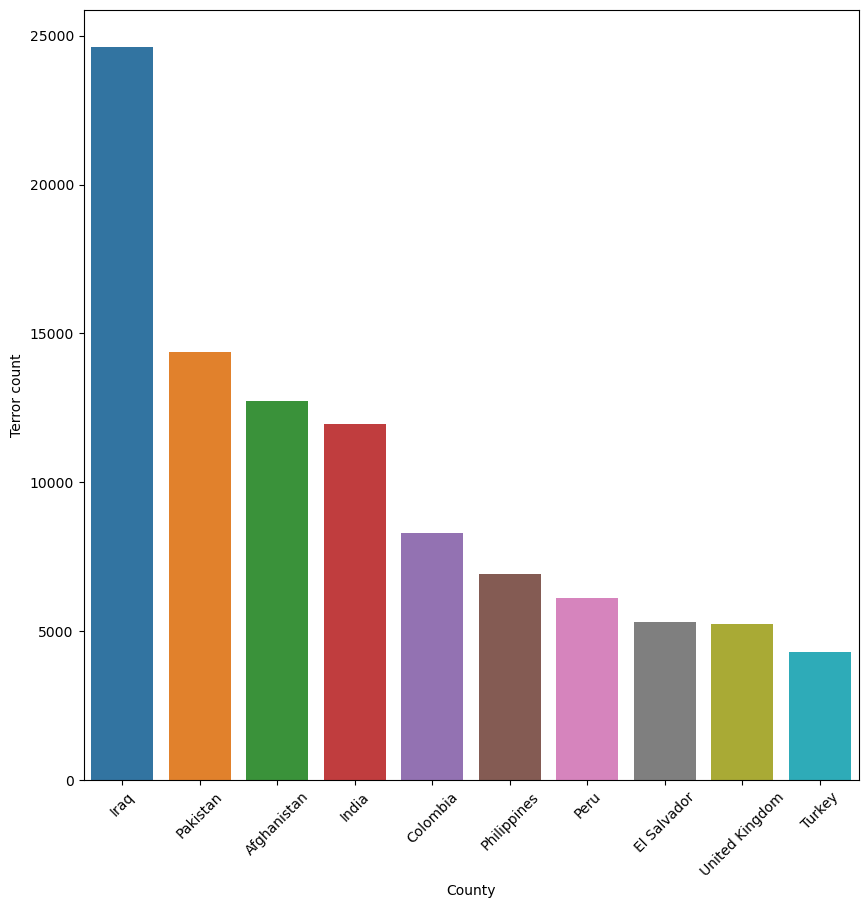

In [22]:
plt.figure(figsize=(10,10))
sns.barplot(x=df_2.index, y="Year", data=df_2)
plt.ylabel("Terror count")
plt.xticks(rotation = 45)
plt.show()

# 3번 문제

In [23]:
df_3 = df[["iyear", "imonth", "iday", "country_txt", "nkill", "nwound", "attacktype1_txt"]]
df_3 = df_3.rename(columns={"iyear" : "Year", "imonth":"Month","iday" : "Day", "country_txt" : "County", "nkill" : "Killed", "nwound" : "Wounded"})
df_3

,Year,Month,Day,County,Killed,Wounded,attacktype1_txt
0,1970,7,2,Dominican Republic,1.0,0.0,Assassination
1,1970,0,0,Mexico,0.0,0.0,Hostage Taking (Kidnapping)
2,1970,1,0,Philippines,1.0,0.0,Assassination
3,1970,1,0,Greece,NaN,NaN,Bombing/Explosion
4,1970,1,0,Japan,NaN,NaN,Facility/Infrastructure Attack
...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,1.0,2.0,Armed Assault
181687,2017,12,31,Syria,2.0,7.0,Bombing/Explosion
181688,2017,12,31,Philippines,0.0,0.0,Facility/Infrastructure Attack
181689,2017,12,31,India,0.0,0.0,Bombing/Explosion


In [24]:
df_3_1 = df_3.groupby("County").agg({"Killed" : ["count", "sum"], "Wounded" : ["count", "sum"], "Year" : "count"})
df_3_1

Killed          Wounded            Year
             count      sum   count      sum  count
County                                             
Afghanistan  12362  39384.0   11994  44277.0  12731
Albania         76     42.0      76    126.0     80
Algeria       2719  11066.0    2630   9150.0   2743
Andorra          0      0.0       0      0.0      1
Angola         482   3043.0     462   2455.0    499
...            ...      ...     ...      ...    ...
Yemen         3083   8776.0    2935   9328.0   3347
Yugoslavia     195    119.0     193    281.0    203
Zaire           50    324.0      48    211.0     50
Zambia          60     70.0      60     62.0     62
Zimbabwe        96    154.0      94    222.0    101

[205 rows x 5 columns]

In [25]:
df_3_1.columns

MultiIndex([( 'Killed', 'count'),
            ( 'Killed',   'sum'),
            ('Wounded', 'count'),
            ('Wounded',   'sum'),
            (   'Year', 'count')],
           )

In [26]:
df_3_1 = df_3_1.sort_values(by = ("Year", "count"), ascending=False).head(10)
df_3_1

Killed          Wounded             Year
                count      sum   count       sum  count
County                                                 
Iraq            23911  78589.0   23370  134690.0  24636
Pakistan        14119  23822.0   13899   42038.0  14368
Afghanistan     12362  39384.0   11994   44277.0  12731
India           11740  19341.0   11506   28980.0  11960
Colombia         7848  14698.0    7722   10328.0   8306
Philippines      6694   9559.0    6605   13367.0   6908
Peru             5457  12771.0    5392    4078.0   6096
El Salvador      3939  12053.0    3901    5062.0   5320
United Kingdom   5065   3410.0    3521    6106.0   5235
Turkey           4160   6888.0    4133    9899.0   4292

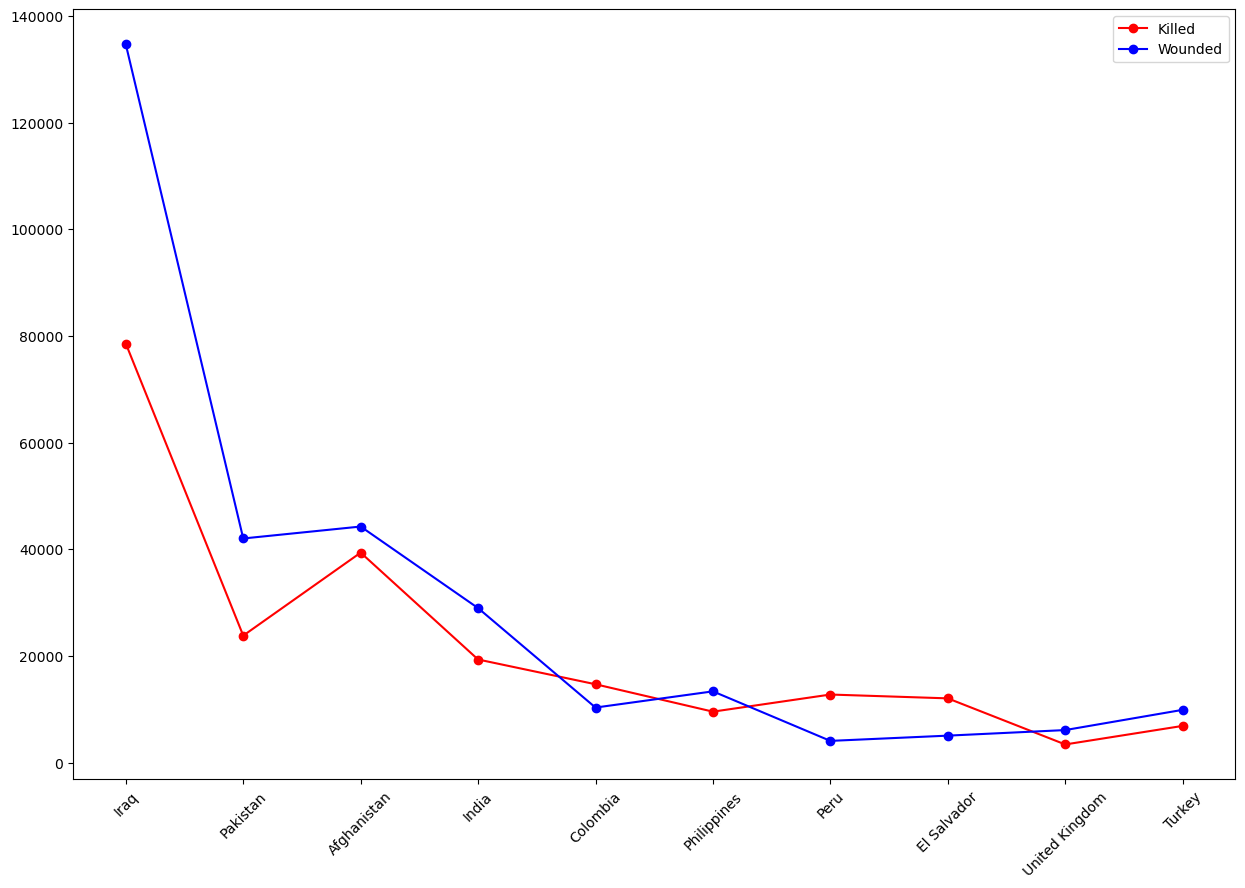

In [27]:
plt.figure(figsize=(15,10))
plt.plot(df_3_1.index, df_3_1["Killed", "sum"], color = "r", marker="o")
plt.plot(df_3_1.index, df_3_1["Wounded", "sum"], color = "b", marker="o")
plt.xticks(df_3_1.index, rotation = 45)
plt.legend(labels = ["Killed", "Wounded"], loc = 'best')
plt.show()

## 국가별 사망자-부상자 추이
- 1970-2017년 국가별 테러 사건 발생 빈도 상위 10개 기준 사망자 대비 부상자가 많으나
- 콜롬비아, 페루, 엘살바도르 3개 국가의 경우 부상자 대비 사망자의 비중이 큼

In [28]:
df_3.columns

Index(['Year', 'Month', 'Day', 'County', 'Killed', 'Wounded',
       'attacktype1_txt'],
      dtype='object')

In [29]:
df_3_2 = df_3.loc[   (df_3["County"] == "Iraq") | (df_3["County"] == "Pakistan") | (df_3["County"] == "Afghanistan") | 
                     (df_3["County"] == "India") | (df_3["County"] == "Colombia") | (df_3["County"] == "Philippines") | 
                     (df_3["County"] == "Peru") | (df_3["County"] == "El Salvador") | (df_3["County"] == "United Kingdom") | 
                     (df_3["County"] == "Turkey")]
df_3_2

,Year,Month,Day,County,Killed,Wounded,attacktype1_txt
2,1970,1,0,Philippines,1.0,0.0,Assassination
26,1970,1,21,Philippines,0.0,0.0,Bombing/Explosion
39,1970,1,31,Philippines,0.0,1.0,Unknown
96,1970,3,0,Philippines,0.0,0.0,Bombing/Explosion
150,1970,3,24,Philippines,1.0,0.0,Unknown
...,...,...,...,...,...,...,...
181684,2017,12,31,India,0.0,0.0,Hostage Taking (Kidnapping)
181685,2017,12,31,Afghanistan,0.0,4.0,Bombing/Explosion
181688,2017,12,31,Philippines,0.0,0.0,Facility/Infrastructure Attack
181689,2017,12,31,India,0.0,0.0,Bombing/Explosion


In [30]:
df_3_2["County"].unique()

array(['Philippines', 'Turkey', 'United Kingdom', 'Colombia', 'Pakistan',
       'India', 'El Salvador', 'Afghanistan', 'Peru', 'Iraq'],
      dtype=object)

In [31]:
df_3_2 = df_3_2.groupby(["County", "attacktype1_txt"]).agg({"Killed" : ["count", "sum"], "Wounded" : ["count", "sum"], "Year" : "count"})
df_3_2

Killed          Wounded  \
                                                    count      sum   count   
County         attacktype1_txt                                               
Afghanistan    Armed Assault                         2818  13367.0    2674   
               Assassination                          952   1558.0     942   
               Bombing/Explosion                     6218  16770.0    6127   
               Facility/Infrastructure Attack         348    220.0     345   
               Hijacking                               11     29.0      11   
...                                                   ...      ...     ...   
United Kingdom Hijacking                               19      2.0      17   
               Hostage Taking (Barricade Incident)     12      9.0      10   
               Hostage Taking (Kidnapping)             50     38.0      26   
               Unarmed Assault                         46     15.0      37   
               Unknown                                 31     17.0      28   

                                                             Year  
                                                        sum count  
County         attacktype1_txt                                     
Afghanistan    Armed Assault                         8401.0  2877  
               Assassination                         1762.0   954  
               Bombing/Explosion                    26563.0  6245  
               Facility/Infrastructure Attack         232.0   355  
               Hijacking                                5.0    16  
...                                                     ...   ...  
United Kingdom Hijacking                                1.0    19  
               Hostage Taking (Barricade Incident)      7.0    14  
               Hostage Taking (Kidnapping)             11.0    53  
               Unarmed Assault                         46.0    46  
               Unknown                                 36.0    38  

[89 rows x 5 columns]

In [32]:
df_3_2.loc["Afghanistan"][('Year', 'count')]

attacktype1_txt
Armed Assault                          2877
Assassination                           954
Bombing/Explosion                      6245
Facility/Infrastructure Attack          355
Hijacking                                16
Hostage Taking (Barricade Incident)      27
Hostage Taking (Kidnapping)            1011
Unarmed Assault                          73
Unknown                                1173
Name: (Year, count), dtype: int64

In [33]:
df_3_2.loc[["Colombia", "El Salvador", "Peru"]][('Year', 'count')]

County       attacktype1_txt                    
Colombia     Armed Assault                          1972
             Assassination                          1343
             Bombing/Explosion                      3128
             Facility/Infrastructure Attack          275
             Hijacking                                33
             Hostage Taking (Barricade Incident)      89
             Hostage Taking (Kidnapping)            1058
             Unarmed Assault                          14
             Unknown                                 394
El Salvador  Armed Assault                          2216
             Assassination                           449
             Bombing/Explosion                      2055
             Facility/Infrastructure Attack          194
             Hostage Taking (Barricade Incident)     117
             Hostage Taking (Kidnapping)             154
             Unarmed Assault                           1
             Unknown                   

In [34]:
df_3_2["Killed high"] = df_3_2.loc[["Colombia", "El Salvador", "Peru"]][('Year', 'count')] / 3
df_3_2

Killed          Wounded  \
                                                    count      sum   count   
County         attacktype1_txt                                               
Afghanistan    Armed Assault                         2818  13367.0    2674   
               Assassination                          952   1558.0     942   
               Bombing/Explosion                     6218  16770.0    6127   
               Facility/Infrastructure Attack         348    220.0     345   
               Hijacking                               11     29.0      11   
...                                                   ...      ...     ...   
United Kingdom Hijacking                               19      2.0      17   
               Hostage Taking (Barricade Incident)     12      9.0      10   
               Hostage Taking (Kidnapping)             50     38.0      26   
               Unarmed Assault                         46     15.0      37   
               Unknown                                 31     17.0      28   

                                                             Year Killed high  
                                                        sum count              
County         attacktype1_txt                                                 
Afghanistan    Armed Assault                         8401.0  2877         NaN  
               Assassination                         1762.0   954         NaN  
               Bombing/Explosion                    26563.0  6245         NaN  
               Facility/Infrastructure Attack         232.0   355         NaN  
               Hijacking                                5.0    16         NaN  
...                                                     ...   ...         ...  
United Kingdom Hijacking                                1.0    19         NaN  
               Hostage Taking (Barricade Incident)      7.0    14         NaN  
               Hostage Taking (Kidnapping)             11.0    53         NaN  
               Unarmed Assault                         46.0    46         NaN  
               Unknown                                 36.0    38         NaN  

[89 rows x 6 columns]

In [35]:
df_3_2.loc["Colombia"]

Killed         Wounded          Year  \
                                     count     sum   count     sum count   
attacktype1_txt                                                            
Armed Assault                         1829  7262.0    1778  2128.0  1972   
Assassination                         1341  2425.0    1313   336.0  1343   
Bombing/Explosion                     3015  2707.0    2992  7170.0  3128   
Facility/Infrastructure Attack         267   136.0     265    49.0   275   
Hijacking                               30     7.0      30     4.0    33   
Hostage Taking (Barricade Incident)     81    31.0      82    20.0    89   
Hostage Taking (Kidnapping)            906   884.0     892   151.0  1058   
Unarmed Assault                         14    74.0      14    18.0    14   
Unknown                                365  1172.0     356   452.0   394   

                                     Killed high  
                                                  
attacktype1_txt                                   
Armed Assault                         657.333333  
Assassination                         447.666667  
Bombing/Explosion                    1042.666667  
Facility/Infrastructure Attack         91.666667  
Hijacking                              11.000000  
Hostage Taking (Barricade Incident)    29.666667  
Hostage Taking (Kidnapping)           352.666667  
Unarmed Assault                         4.666667  
Unknown                               131.333333

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Armed Assault'),
  Text(1, 0, 'Assassination'),
  Text(2, 0, 'Bombing/Explosion'),
  Text(3, 0, 'Facility/Infrastructure Attack'),
  Text(4, 0, 'Hijacking'),
  Text(5, 0, 'Hostage Taking (Barricade Incident)'),
  Text(6, 0, 'Hostage Taking (Kidnapping)'),
  Text(7, 0, 'Unarmed Assault'),
  Text(8, 0, 'Unknown')])

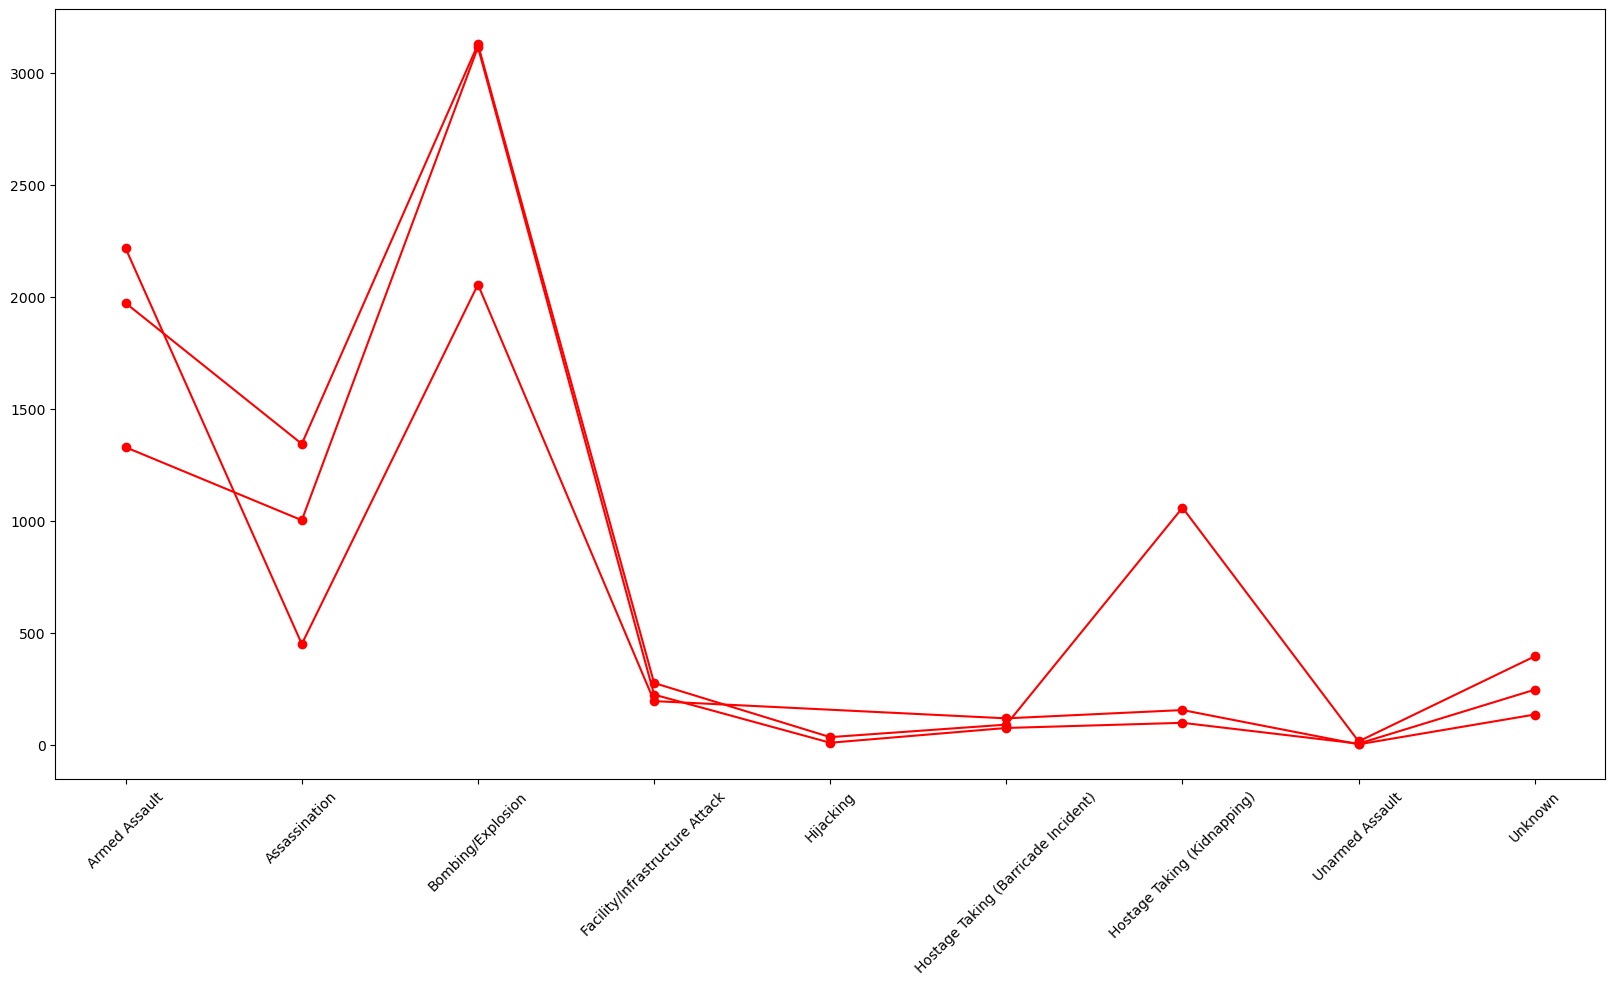

In [36]:
plt.figure(figsize=(20,10))
plt.plot()
plt.plot(df_3_2.loc["Colombia"].index, df_3_2.loc["Colombia"][('Year', 'count')], color = "r", marker="o")
plt.plot(df_3_2.loc["El Salvador"].index, df_3_2.loc["El Salvador"][('Year', 'count')], color = "r", marker="o")
plt.plot(df_3_2.loc["Peru"].index, df_3_2.loc["Peru"][('Year', 'count')], color = "r", marker="o")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Armed Assault'),
  Text(1, 0, 'Assassination'),
  Text(2, 0, 'Bombing/Explosion'),
  Text(3, 0, 'Facility/Infrastructure Attack'),
  Text(4, 0, 'Hijacking'),
  Text(5, 0, 'Hostage Taking (Barricade Incident)'),
  Text(6, 0, 'Hostage Taking (Kidnapping)'),
  Text(7, 0, 'Unarmed Assault'),
  Text(8, 0, 'Unknown')])

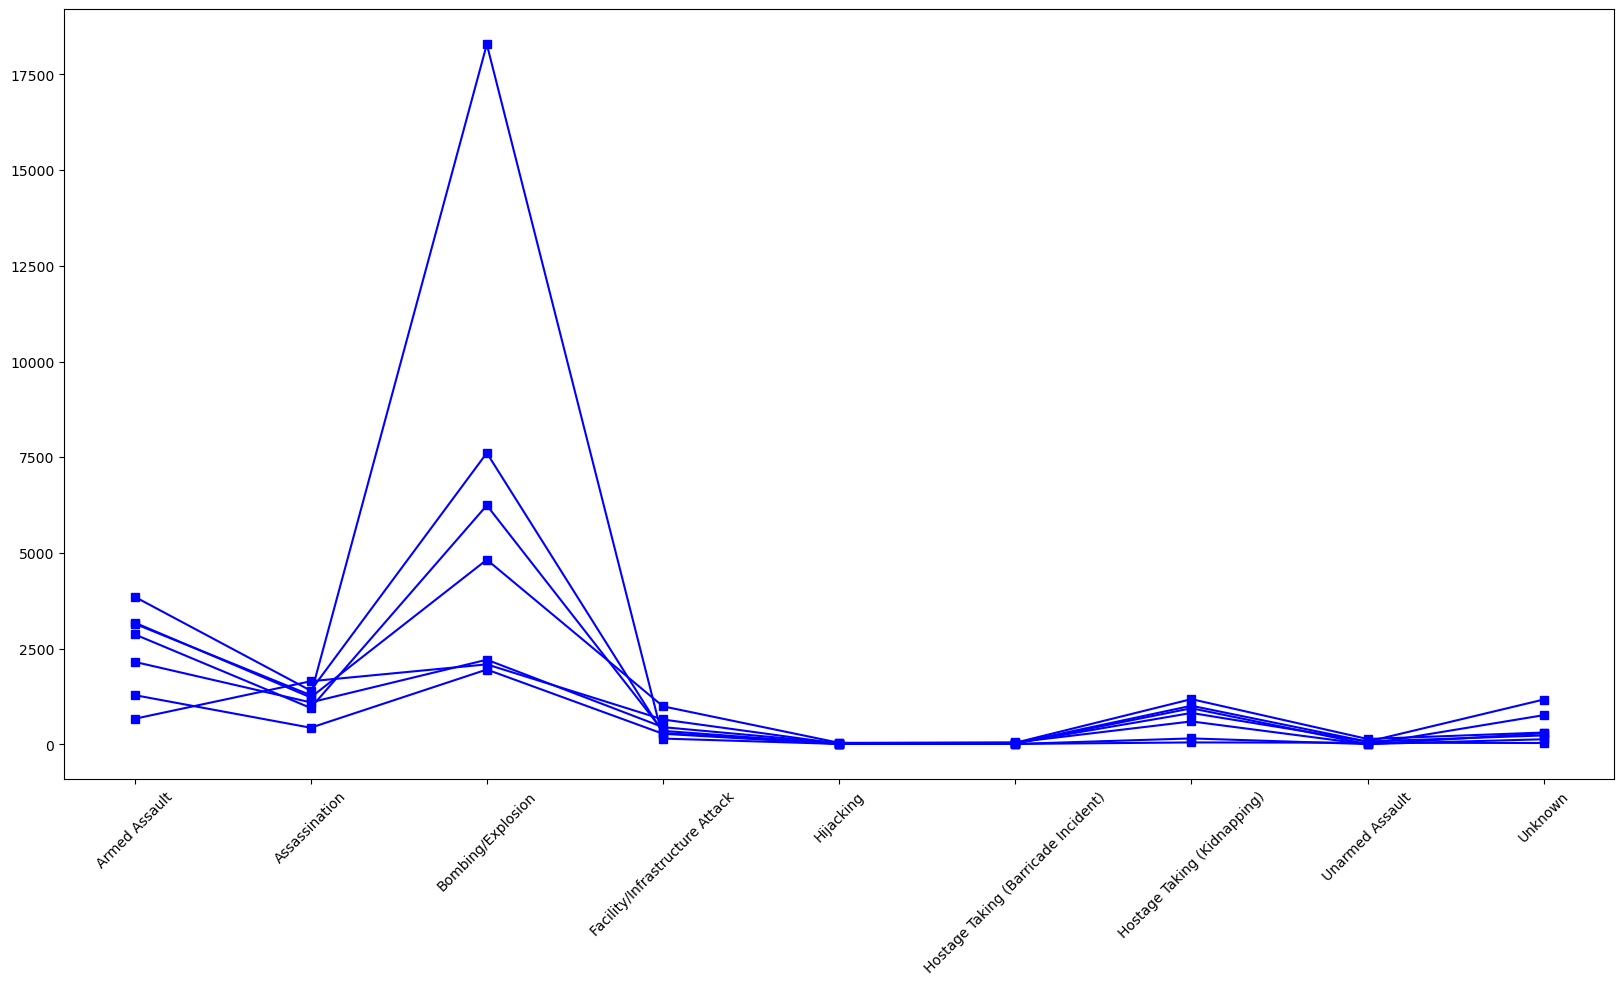

In [37]:
plt.figure(figsize=(20,10))
plt.plot(df_3_2.loc["Iraq"].index, df_3_2.loc["Iraq"][('Year', 'count')], color = "b", marker="s")
plt.plot(df_3_2.loc["Pakistan"].index, df_3_2.loc["Pakistan"][('Year', 'count')], color = "b", marker="s")
plt.plot(df_3_2.loc["Afghanistan"].index, df_3_2.loc["Afghanistan"][('Year', 'count')], color = "b", marker="s")
plt.plot(df_3_2.loc["India"].index, df_3_2.loc["India"][('Year', 'count')], color = "b", marker="s")
plt.plot(df_3_2.loc["Philippines"].index, df_3_2.loc["Philippines"][('Year', 'count')], color = "b", marker="s")
plt.plot(df_3_2.loc["United Kingdom"].index, df_3_2.loc["United Kingdom"][('Year', 'count')], color = "b", marker="s")
plt.plot(df_3_2.loc["Turkey"].index, df_3_2.loc["Turkey"][('Year', 'count')], color = "b", marker="s")
plt.xticks(rotation=45)

## 사망자 - 부상자 차이 국가별 분석
- 부상자 대비 사망자가 많은 3개국(페루, 콜롬비아, 엘살바도르)의 경우 나머지 7개 국가에 비해 테러 공격 형태 중 무장 공격에 의한 비중이 많음
- 확정적으로 결론을 내릴 수 없지만, 나머지 7개 국가에 비해 무장공격의 비중이 높기 때문에 사망자의 수가 많다고 잠정적으로 생각

# 4번 문제

In [38]:
df["region_txt"].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [39]:
df_4 = df[["region_txt", "attacktype1_txt", "nkill", "nwound"]]
df_4

,region_txt,attacktype1_txt,nkill,nwound
0,Central America & Caribbean,Assassination,1.0,0.0
1,North America,Hostage Taking (Kidnapping),0.0,0.0
2,Southeast Asia,Assassination,1.0,0.0
3,Western Europe,Bombing/Explosion,NaN,NaN
4,East Asia,Facility/Infrastructure Attack,NaN,NaN
...,...,...,...,...
181686,Sub-Saharan Africa,Armed Assault,1.0,2.0
181687,Middle East & North Africa,Bombing/Explosion,2.0,7.0
181688,Southeast Asia,Facility/Infrastructure Attack,0.0,0.0
181689,South Asia,Bombing/Explosion,0.0,0.0


In [40]:
df_4 = df_4.rename(columns={"region_txt" : "Region", "attacktype1_txt" : "Type", "nkill" : "Killed", "nwound" : "Wounded"})
df_4

,Region,Type,Killed,Wounded
0,Central America & Caribbean,Assassination,1.0,0.0
1,North America,Hostage Taking (Kidnapping),0.0,0.0
2,Southeast Asia,Assassination,1.0,0.0
3,Western Europe,Bombing/Explosion,NaN,NaN
4,East Asia,Facility/Infrastructure Attack,NaN,NaN
...,...,...,...,...
181686,Sub-Saharan Africa,Armed Assault,1.0,2.0
181687,Middle East & North Africa,Bombing/Explosion,2.0,7.0
181688,Southeast Asia,Facility/Infrastructure Attack,0.0,0.0
181689,South Asia,Bombing/Explosion,0.0,0.0


In [41]:
df_4 = df_4.loc[  (df_4["Region"] == "Middle East & North Africa") |
            (df_4["Region"] == "South Asia") |
            (df_4["Region"] == "South America") |
            (df_4["Region"] == "Western Europe") |
            (df_4["Region"] == "Southeast Asia") |
            (df_4["Region"] == "Eastern Europe") |
            (df_4["Region"] == "North America") |
            (df_4["Region"] == "East Asia") ]

In [42]:
df_4 = df_4.groupby(["Region", "Type"]).agg({"Killed" : ["count", "sum"], "Wounded" : ["count", "sum"]})
df_4

Killed        Wounded  \
                                                    count    sum   count   
Region         Type                                                        
East Asia      Armed Assault                          113  612.0     111   
               Assassination                           55   44.0      55   
               Bombing/Explosion                      310  398.0     305   
               Facility/Infrastructure Attack         188   32.0     190   
               Hijacking                               18    9.0      18   
...                                                   ...    ...     ...   
Western Europe Hijacking                               66  133.0      60   
               Hostage Taking (Barricade Incident)     82  170.0      82   
               Hostage Taking (Kidnapping)            223   77.0     197   
               Unarmed Assault                        147   53.0     135   
               Unknown                                243   30.0     240   

                                                            
                                                       sum  
Region         Type                                         
East Asia      Armed Assault                         707.0  
               Assassination                          35.0  
               Bombing/Explosion                    1135.0  
               Facility/Infrastructure Attack        142.0  
               Hijacking                              17.0  
...                                                    ...  
Western Europe Hijacking                              66.0  
               Hostage Taking (Barricade Incident)   389.0  
               Hostage Taking (Kidnapping)            33.0  
               Unarmed Assault                       435.0  
               Unknown                               126.0  

[72 rows x 4 columns]

In [43]:
df_4.loc["East Asia"].index

Index(['Armed Assault', 'Assassination', 'Bombing/Explosion',
       'Facility/Infrastructure Attack', 'Hijacking',
       'Hostage Taking (Barricade Incident)', 'Hostage Taking (Kidnapping)',
       'Unarmed Assault', 'Unknown'],
      dtype='object', name='Type')

In [44]:
df_4.loc["East Asia"]["Killed", "count"]

Type
Armed Assault                          113
Assassination                           55
Bombing/Explosion                      310
Facility/Infrastructure Attack         188
Hijacking                               18
Hostage Taking (Barricade Incident)      3
Hostage Taking (Kidnapping)             13
Unarmed Assault                         42
Unknown                                 21
Name: (Killed, count), dtype: int64

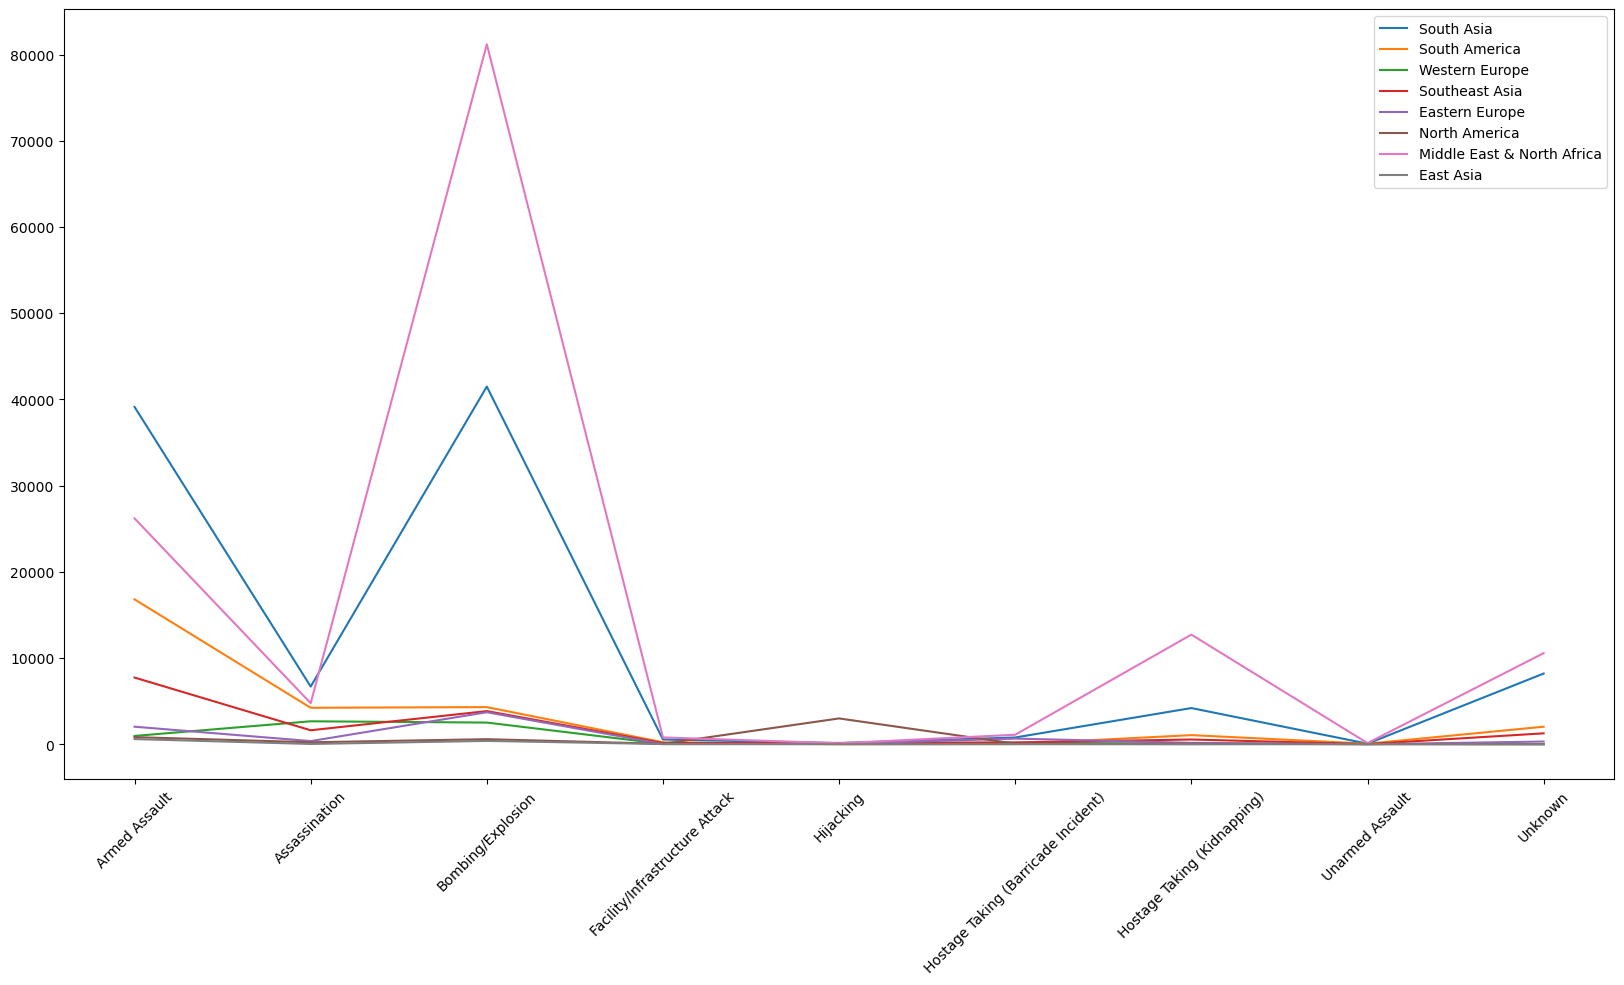

In [45]:
plt.figure(figsize=(20, 10))
plt.plot(df_4.loc["South Asia"].index, df_4.loc["South Asia"]["Killed", "sum"], label = "South Asia")
plt.plot(df_4.loc["South America"].index, df_4.loc["South America"]["Killed", "sum"],label ="South America")
plt.plot(df_4.loc["Western Europe"].index, df_4.loc["Western Europe"]["Killed", "sum"], label ="Western Europe")
plt.plot(df_4.loc["Southeast Asia"].index, df_4.loc["Southeast Asia"]["Killed", "sum"], label ="Southeast Asia")
plt.plot(df_4.loc["Eastern Europe"].index, df_4.loc["Eastern Europe"]["Killed", "sum"], label ="Eastern Europe")
plt.plot(df_4.loc["North America"].index, df_4.loc["North America"]["Killed", "sum"], label ="North America")
plt.plot(df_4.loc["Middle East & North Africa"].index, df_4.loc["Middle East & North Africa"]["Killed", "sum"], label ="Middle East & North Africa")
plt.plot(df_4.loc["East Asia"].index, df_4.loc["East Asia"]["Killed", "sum"], label ="East Asia")
plt.legend()
plt.xticks(rotation = 45)
plt.show()

## 지역별 테러 사망자 합계
- 중동&북아프리카에서 전체적인 테러에 의한 사망자 합계가 많으며, 폭탄에 의한 테러 사망자 수가 가장 많이 나타남
- 또한, 인질극(납치)에 대한 테러 사건이 중동&북아프리카에서 예외적으로 많이 발생함
- 다음으로 남아시에서 무장 테러에 의한 테러가 가장 많이 나타나며, 폭탄에 의한 테러가 중동&북아프리카 다음으로 많이 나타남

In [46]:
df_4 = df_4.sort_values(("Killed", "sum"), ascending=False).head(10)
df_4

Killed           \
                                                        count      sum   
Region                     Type                                          
Middle East & North Africa Bombing/Explosion            30027  81183.0   
South Asia                 Bombing/Explosion            21096  41490.0   
                           Armed Assault                11307  39132.0   
Middle East & North Africa Armed Assault                 9042  26201.0   
South America              Armed Assault                 3599  16814.0   
Middle East & North Africa Hostage Taking (Kidnapping)   1799  12722.0   
                           Unknown                       1683  10576.0   
South Asia                 Unknown                       1935   8211.0   
Southeast Asia             Armed Assault                 3972   7745.0   
South Asia                 Assassination                 4294   6701.0   

                                                       Wounded            
                                                         count       sum  
Region                     Type                                           
Middle East & North Africa Bombing/Explosion             29345  187839.0  
South Asia                 Bombing/Explosion             20859   97925.0  
                           Armed Assault                 10935   24505.0  
Middle East & North Africa Armed Assault                  8795   14894.0  
South America              Armed Assault                  3500    3887.0  
Middle East & North Africa Hostage Taking (Kidnapping)    1685    1518.0  
                           Unknown                        1543    3477.0  
South Asia                 Unknown                        1876    6529.0  
Southeast Asia             Armed Assault                  3888    5667.0  
South Asia                 Assassination                  4212    5180.0

In [47]:
df_4 = df_4.reset_index()
df_4

Region                         Type Killed           \
                                                            count      sum   
0  Middle East & North Africa            Bombing/Explosion  30027  81183.0   
1                  South Asia            Bombing/Explosion  21096  41490.0   
2                  South Asia                Armed Assault  11307  39132.0   
3  Middle East & North Africa                Armed Assault   9042  26201.0   
4               South America                Armed Assault   3599  16814.0   
5  Middle East & North Africa  Hostage Taking (Kidnapping)   1799  12722.0   
6  Middle East & North Africa                      Unknown   1683  10576.0   
7                  South Asia                      Unknown   1935   8211.0   
8              Southeast Asia                Armed Assault   3972   7745.0   
9                  South Asia                Assassination   4294   6701.0   

  Wounded            
    count       sum  
0   29345  187839.0  
1   20859   97925.0  
2   10935   24505.0  
3    8795   14894.0  
4    3500    3887.0  
5    1685    1518.0  
6    1543    3477.0  
7    1876    6529.0  
8    3888    5667.0  
9    4212    5180.0

In [48]:
df_4["Region_Type"] = df_4["Region"] + " " + df_4["Type"]
df_4

Region                         Type Killed           \
                                                            count      sum   
0  Middle East & North Africa            Bombing/Explosion  30027  81183.0   
1                  South Asia            Bombing/Explosion  21096  41490.0   
2                  South Asia                Armed Assault  11307  39132.0   
3  Middle East & North Africa                Armed Assault   9042  26201.0   
4               South America                Armed Assault   3599  16814.0   
5  Middle East & North Africa  Hostage Taking (Kidnapping)   1799  12722.0   
6  Middle East & North Africa                      Unknown   1683  10576.0   
7                  South Asia                      Unknown   1935   8211.0   
8              Southeast Asia                Armed Assault   3972   7745.0   
9                  South Asia                Assassination   4294   6701.0   

  Wounded                                                  Region_Type  
    count       sum                                                     
0   29345  187839.0       Middle East & North Africa Bombing/Explosion  
1   20859   97925.0                       South Asia Bombing/Explosion  
2   10935   24505.0                           South Asia Armed Assault  
3    8795   14894.0           Middle East & North Africa Armed Assault  
4    3500    3887.0                        South America Armed Assault  
5    1685    1518.0  Middle East & North Africa Hostage Taking (Kid...  
6    1543    3477.0                 Middle East & North Africa Unknown  
7    1876    6529.0                                 South Asia Unknown  
8    3888    5667.0                       Southeast Asia Armed Assault  
9    4212    5180.0                           South Asia Assassination

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Middle East & North Africa Bombing/Explosion'),
  Text(1, 0, 'South Asia Bombing/Explosion'),
  Text(2, 0, 'South Asia Armed Assault'),
  Text(3, 0, 'Middle East & North Africa Armed Assault'),
  Text(4, 0, 'South America Armed Assault'),
  Text(5, 0, 'Middle East & North Africa Hostage Taking (Kidnapping)'),
  Text(6, 0, 'Middle East & North Africa Unknown'),
  Text(7, 0, 'South Asia Unknown'),
  Text(8, 0, 'Southeast Asia Armed Assault'),
  Text(9, 0, 'South Asia Assassination')])

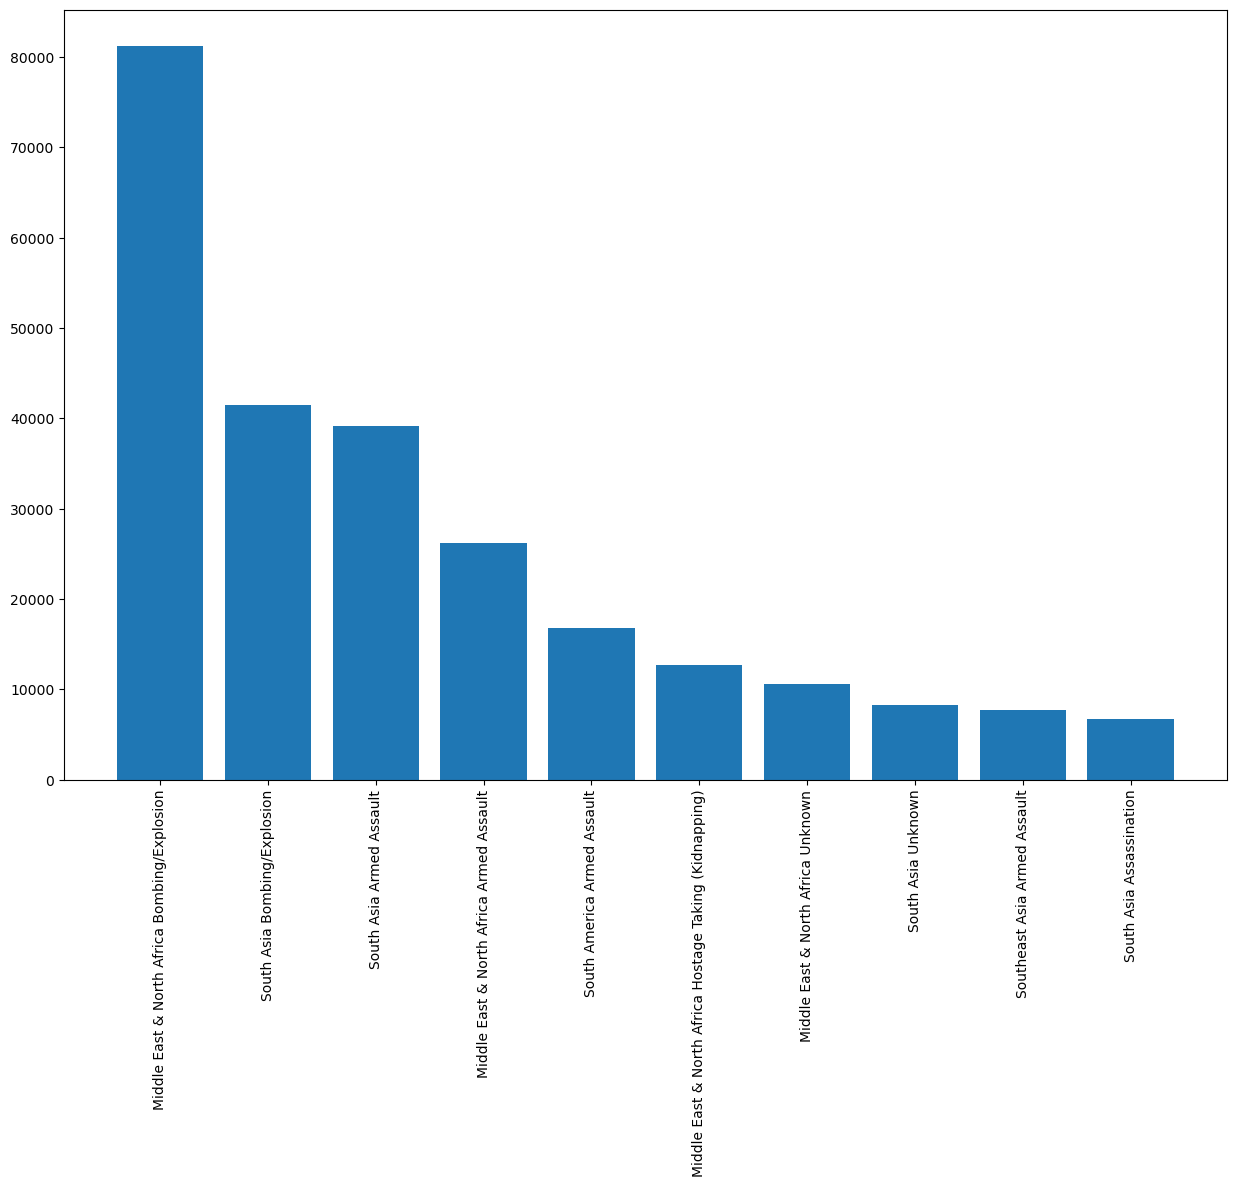

In [49]:
plt.figure(figsize=(15,10))
plt.bar(df_4["Region_Type"], df_4["Killed", "sum"])
plt.xticks(rotation=90)

## 지역별 테러 형태 상위 10개 수치
- 지역별 테러 형태에 따른 상위 10개 항목 중 상위 5개 항목은 폭발 테러, 무장 테러 등이 나타남
- 또한, 상위 5개 항목 중 중동&북아프리카, 남아시아에서 많은 두 테러 형태의 사망사 합계가 높게 보임

# 5번 문제

In [50]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [51]:
df_5 = df[["iyear", "region_txt", "attacktype1_txt", "nkill", "nwound"]]
df_5

,iyear,region_txt,attacktype1_txt,nkill,nwound
0,1970,Central America & Caribbean,Assassination,1.0,0.0
1,1970,North America,Hostage Taking (Kidnapping),0.0,0.0
2,1970,Southeast Asia,Assassination,1.0,0.0
3,1970,Western Europe,Bombing/Explosion,NaN,NaN
4,1970,East Asia,Facility/Infrastructure Attack,NaN,NaN
...,...,...,...,...,...
181686,2017,Sub-Saharan Africa,Armed Assault,1.0,2.0
181687,2017,Middle East & North Africa,Bombing/Explosion,2.0,7.0
181688,2017,Southeast Asia,Facility/Infrastructure Attack,0.0,0.0
181689,2017,South Asia,Bombing/Explosion,0.0,0.0


In [52]:
df_5 = df_5.rename(columns={"iyear":"Year","region_txt" : "Region", "attacktype1_txt" : "Type", "nkill" : "Killed", "nwound" : "Wounded"})
df_5

,Year,Region,Type,Killed,Wounded
0,1970,Central America & Caribbean,Assassination,1.0,0.0
1,1970,North America,Hostage Taking (Kidnapping),0.0,0.0
2,1970,Southeast Asia,Assassination,1.0,0.0
3,1970,Western Europe,Bombing/Explosion,NaN,NaN
4,1970,East Asia,Facility/Infrastructure Attack,NaN,NaN
...,...,...,...,...,...
181686,2017,Sub-Saharan Africa,Armed Assault,1.0,2.0
181687,2017,Middle East & North Africa,Bombing/Explosion,2.0,7.0
181688,2017,Southeast Asia,Facility/Infrastructure Attack,0.0,0.0
181689,2017,South Asia,Bombing/Explosion,0.0,0.0


In [53]:
df_5 = df_5.loc[  (df_5["Region"] == "Middle East & North Africa") |
            (df_5["Region"] == "South Asia") |
            (df_5["Region"] == "South America") |
            (df_5["Region"] == "Western Europe") |
            (df_5["Region"] == "Southeast Asia") |
            (df_5["Region"] == "Eastern Europe") |
            (df_5["Region"] == "North America") |
            (df_5["Region"] == "East Asia") ]
df_5

,Year,Region,Type,Killed,Wounded
1,1970,North America,Hostage Taking (Kidnapping),0.0,0.0
2,1970,Southeast Asia,Assassination,1.0,0.0
3,1970,Western Europe,Bombing/Explosion,NaN,NaN
4,1970,East Asia,Facility/Infrastructure Attack,NaN,NaN
5,1970,North America,Armed Assault,0.0,0.0
...,...,...,...,...,...
181685,2017,South Asia,Bombing/Explosion,0.0,4.0
181687,2017,Middle East & North Africa,Bombing/Explosion,2.0,7.0
181688,2017,Southeast Asia,Facility/Infrastructure Attack,0.0,0.0
181689,2017,South Asia,Bombing/Explosion,0.0,0.0


In [54]:
df_5 = df_5.loc[ (df_5["Year"] == 1992) |
                   (df_5["Year"] == 1994) |
               (df_5["Year"] == 2014) |
               (df_5["Year"] == 2015) ]
df_5

,Year,Region,Type,Killed,Wounded
49644,1992,Western Europe,Assassination,0.0,0.0
49646,1992,Middle East & North Africa,Assassination,1.0,0.0
49648,1992,Western Europe,Facility/Infrastructure Attack,0.0,0.0
49649,1992,Western Europe,Facility/Infrastructure Attack,0.0,0.0
49650,1992,Western Europe,Facility/Infrastructure Attack,0.0,0.0
...,...,...,...,...,...
157197,2015,Western Europe,Bombing/Explosion,0.0,0.0
157198,2015,Southeast Asia,Armed Assault,1.0,2.0
157200,2015,Middle East & North Africa,Hostage Taking (Kidnapping),0.0,0.0
157295,2015,South Asia,Hostage Taking (Kidnapping),NaN,NaN


In [55]:
df_5["Region"].unique(), df_5["Year"].unique()

(array(['Western Europe', 'Middle East & North Africa', 'South America',
        'South Asia', 'Eastern Europe', 'Southeast Asia', 'East Asia',
        'North America'], dtype=object),
 array([1992, 1994, 2014, 2015], dtype=int64))

In [56]:
df_5_1 = df_5.loc[df_5["Region"] == "Western Europe"].groupby(["Year", "Type"]).agg({"Killed":["count", "sum"], "Wounded" :["count", "sum"]}).head(1)

In [57]:
df_5 = df_5.groupby(["Year", "Type", "Region"]).agg({"Killed":["count", "sum"], "Wounded" :["count", "sum"]})
df_5

Killed         Wounded        
                                               count     sum   count     sum
Year Type          Region                                                   
1992 Armed Assault East Asia                       9     0.0       9     0.0
                   Eastern Europe                 27    33.0      27    54.0
                   Middle East & North Africa    393  1247.0     393   635.0
                   North America                   2     4.0       2     0.0
                   South America                 230   775.0     230   307.0
...                                              ...     ...     ...     ...
2015 Unknown       Middle East & North Africa    395  2906.0     330  1109.0
                   South America                  12     7.0      12    14.0
                   South Asia                    223   870.0     213   630.0
                   Southeast Asia                 16    12.0      16     9.0
                   Western Europe                  3     0.0       3     2.0

[254 rows x 4 columns]

In [58]:
df_5.columns

MultiIndex([( 'Killed', 'count'),
            ( 'Killed',   'sum'),
            ('Wounded', 'count'),
            ('Wounded',   'sum')],
           )

In [59]:
df_5["Total_count"] = (df_5[( 'Killed', 'count')] + df_5[( 'Wounded', 'count')]) / 2
df_5["Total_sum"] = df_5[( 'Killed', 'sum')] + df_5[( 'Wounded', 'sum')]
df_5

Killed         Wounded          \
                                               count     sum   count     sum   
Year Type          Region                                                      
1992 Armed Assault East Asia                       9     0.0       9     0.0   
                   Eastern Europe                 27    33.0      27    54.0   
                   Middle East & North Africa    393  1247.0     393   635.0   
                   North America                   2     4.0       2     0.0   
                   South America                 230   775.0     230   307.0   
...                                              ...     ...     ...     ...   
2015 Unknown       Middle East & North Africa    395  2906.0     330  1109.0   
                   South America                  12     7.0      12    14.0   
                   South Asia                    223   870.0     213   630.0   
                   Southeast Asia                 16    12.0      16     9.0   
                   Western Europe                  3     0.0       3     2.0   

                                              Total_count Total_sum  
                                                                     
Year Type          Region                                            
1992 Armed Assault East Asia                          9.0       0.0  
                   Eastern Europe                    27.0      87.0  
                   Middle East & North Africa       393.0    1882.0  
                   North America                      2.0       4.0  
                   South America                    230.0    1082.0  
...                                                   ...       ...  
2015 Unknown       Middle East & North Africa       362.5    4015.0  
                   South America                     12.0      21.0  
                   South Asia                       218.0    1500.0  
                   Southeast Asia                    16.0      21.0  
                   Western Europe                     3.0       2.0  

[254 rows x 6 columns]

In [60]:
df_5 = df_5.sort_values(by="Total_sum", ascending=False).reset_index()
df_5

Year                                 Type                      Region  \
                                                                             
0    2015                    Bombing/Explosion  Middle East & North Africa   
1    2014                    Bombing/Explosion  Middle East & North Africa   
2    2014                    Bombing/Explosion                  South Asia   
3    2015                    Bombing/Explosion                  South Asia   
4    2015                        Armed Assault                  South Asia   
..    ...                                  ...                         ...   
249  2014       Facility/Infrastructure Attack               North America   
250  1992                      Unarmed Assault              Southeast Asia   
251  1992                      Unarmed Assault                  South Asia   
252  2015  Hostage Taking (Barricade Incident)               South America   
253  1992                        Armed Assault                   East Asia   

    Killed          Wounded          Total_count Total_sum  
     count      sum   count      sum                        
0     3821  11156.0    3682  20900.0      3751.5   32056.0  
1     4321   9065.0    4207  19384.0      4264.0   28449.0  
2     2628   3232.0    2612   6195.0      2620.0    9427.0  
3     2106   2369.0    2093   5227.0      2099.5    7596.0  
4     1090   3765.0    1037   2747.0      1063.5    6512.0  
..     ...      ...     ...      ...         ...       ...  
249      6      0.0       6      0.0         6.0       0.0  
250      1      0.0       1      0.0         1.0       0.0  
251      5      0.0       5      0.0         5.0       0.0  
252      2      0.0       2      0.0         2.0       0.0  
253      9      0.0       9      0.0         9.0       0.0  

[254 rows x 9 columns]

In [61]:
df_5["Year"] = df_5["Year"].astype("string")

In [62]:
df_5["Year_Type_Region"] = df_5["Year"] + "/" + df_5["Type"] + "/" + df_5["Region"]
df_5

Year                                 Type                      Region  \
                                                                             
0    2015                    Bombing/Explosion  Middle East & North Africa   
1    2014                    Bombing/Explosion  Middle East & North Africa   
2    2014                    Bombing/Explosion                  South Asia   
3    2015                    Bombing/Explosion                  South Asia   
4    2015                        Armed Assault                  South Asia   
..    ...                                  ...                         ...   
249  2014       Facility/Infrastructure Attack               North America   
250  1992                      Unarmed Assault              Southeast Asia   
251  1992                      Unarmed Assault                  South Asia   
252  2015  Hostage Taking (Barricade Incident)               South America   
253  1992                        Armed Assault                   East Asia   

    Killed          Wounded          Total_count Total_sum  \
     count      sum   count      sum                         
0     3821  11156.0    3682  20900.0      3751.5   32056.0   
1     4321   9065.0    4207  19384.0      4264.0   28449.0   
2     2628   3232.0    2612   6195.0      2620.0    9427.0   
3     2106   2369.0    2093   5227.0      2099.5    7596.0   
4     1090   3765.0    1037   2747.0      1063.5    6512.0   
..     ...      ...     ...      ...         ...       ...   
249      6      0.0       6      0.0         6.0       0.0   
250      1      0.0       1      0.0         1.0       0.0   
251      5      0.0       5      0.0         5.0       0.0   
252      2      0.0       2      0.0         2.0       0.0   
253      9      0.0       9      0.0         9.0       0.0   

                                      Year_Type_Region  
                                                        
0    2015/Bombing/Explosion/Middle East & North Africa  
1    2014/Bombing/Explosion/Middle East & North Africa  
2                    2014/Bombing/Explosion/South Asia  
3                    2015/Bombing/Explosion/South Asia  
4                        2015/Armed Assault/South Asia  
..                                                 ...  
249  2014/Facility/Infrastructure Attack/North America  
250                1992/Unarmed Assault/Southeast Asia  
251                    1992/Unarmed Assault/South Asia  
252  2015/Hostage Taking (Barricade Incident)/South...  
253                       1992/Armed Assault/East Asia  

[254 rows x 10 columns]

In [63]:
df_5.columns

MultiIndex([(            'Year',      ''),
            (            'Type',      ''),
            (          'Region',      ''),
            (          'Killed', 'count'),
            (          'Killed',   'sum'),
            (         'Wounded', 'count'),
            (         'Wounded',   'sum'),
            (     'Total_count',      ''),
            (       'Total_sum',      ''),
            ('Year_Type_Region',      '')],
           )

In [64]:
df_5.drop([(          'Killed',   'count'), (         'Wounded', 'count')],axis=1, inplace=True)

In [65]:
df_5_1 = df_5.loc[(df_5["Year"] == "1992") |
                   (df_5["Year"] == "1994") ]
df_5_2 = df_5.loc[(df_5["Year"] == "2014") |
                   (df_5["Year"] == "2015") ]

In [66]:
df_5_1 = df_5_1.sort_values(by="Total_sum", ascending=False).head()
df_5_1

,Year,Type,Region,Killed,Wounded,Total_count,Total_sum,Year_Type_Region
,,,,sum,sum,,,
10,1992,Armed Assault,South Asia,1519.0,967.0,202.0,2486.0,1992/Armed Assault/South Asia
12,1992,Armed Assault,Middle East & North Africa,1247.0,635.0,393.0,1882.0,1992/Armed Assault/Middle East & North Africa
13,1994,Armed Assault,Middle East & North Africa,1209.0,546.0,288.0,1755.0,1994/Armed Assault/Middle East & North Africa
15,1992,Bombing/Explosion,South Asia,498.0,1186.0,131.0,1684.0,1992/Bombing/Explosion/South Asia
16,1992,Bombing/Explosion,South America,436.0,1085.0,673.5,1521.0,1992/Bombing/Explosion/South America


In [67]:
df_5_2= df_5_2.sort_values(by="Total_sum", ascending=False).head()
df_5_2

,Year,Type,Region,Killed,Wounded,Total_count,Total_sum,Year_Type_Region
,,,,sum,sum,,,
0,2015,Bombing/Explosion,Middle East & North Africa,11156.0,20900.0,3751.5,32056.0,2015/Bombing/Explosion/Middle East & North Africa
1,2014,Bombing/Explosion,Middle East & North Africa,9065.0,19384.0,4264.0,28449.0,2014/Bombing/Explosion/Middle East & North Africa
2,2014,Bombing/Explosion,South Asia,3232.0,6195.0,2620.0,9427.0,2014/Bombing/Explosion/South Asia
3,2015,Bombing/Explosion,South Asia,2369.0,5227.0,2099.5,7596.0,2015/Bombing/Explosion/South Asia
4,2015,Armed Assault,South Asia,3765.0,2747.0,1063.5,6512.0,2015/Armed Assault/South Asia


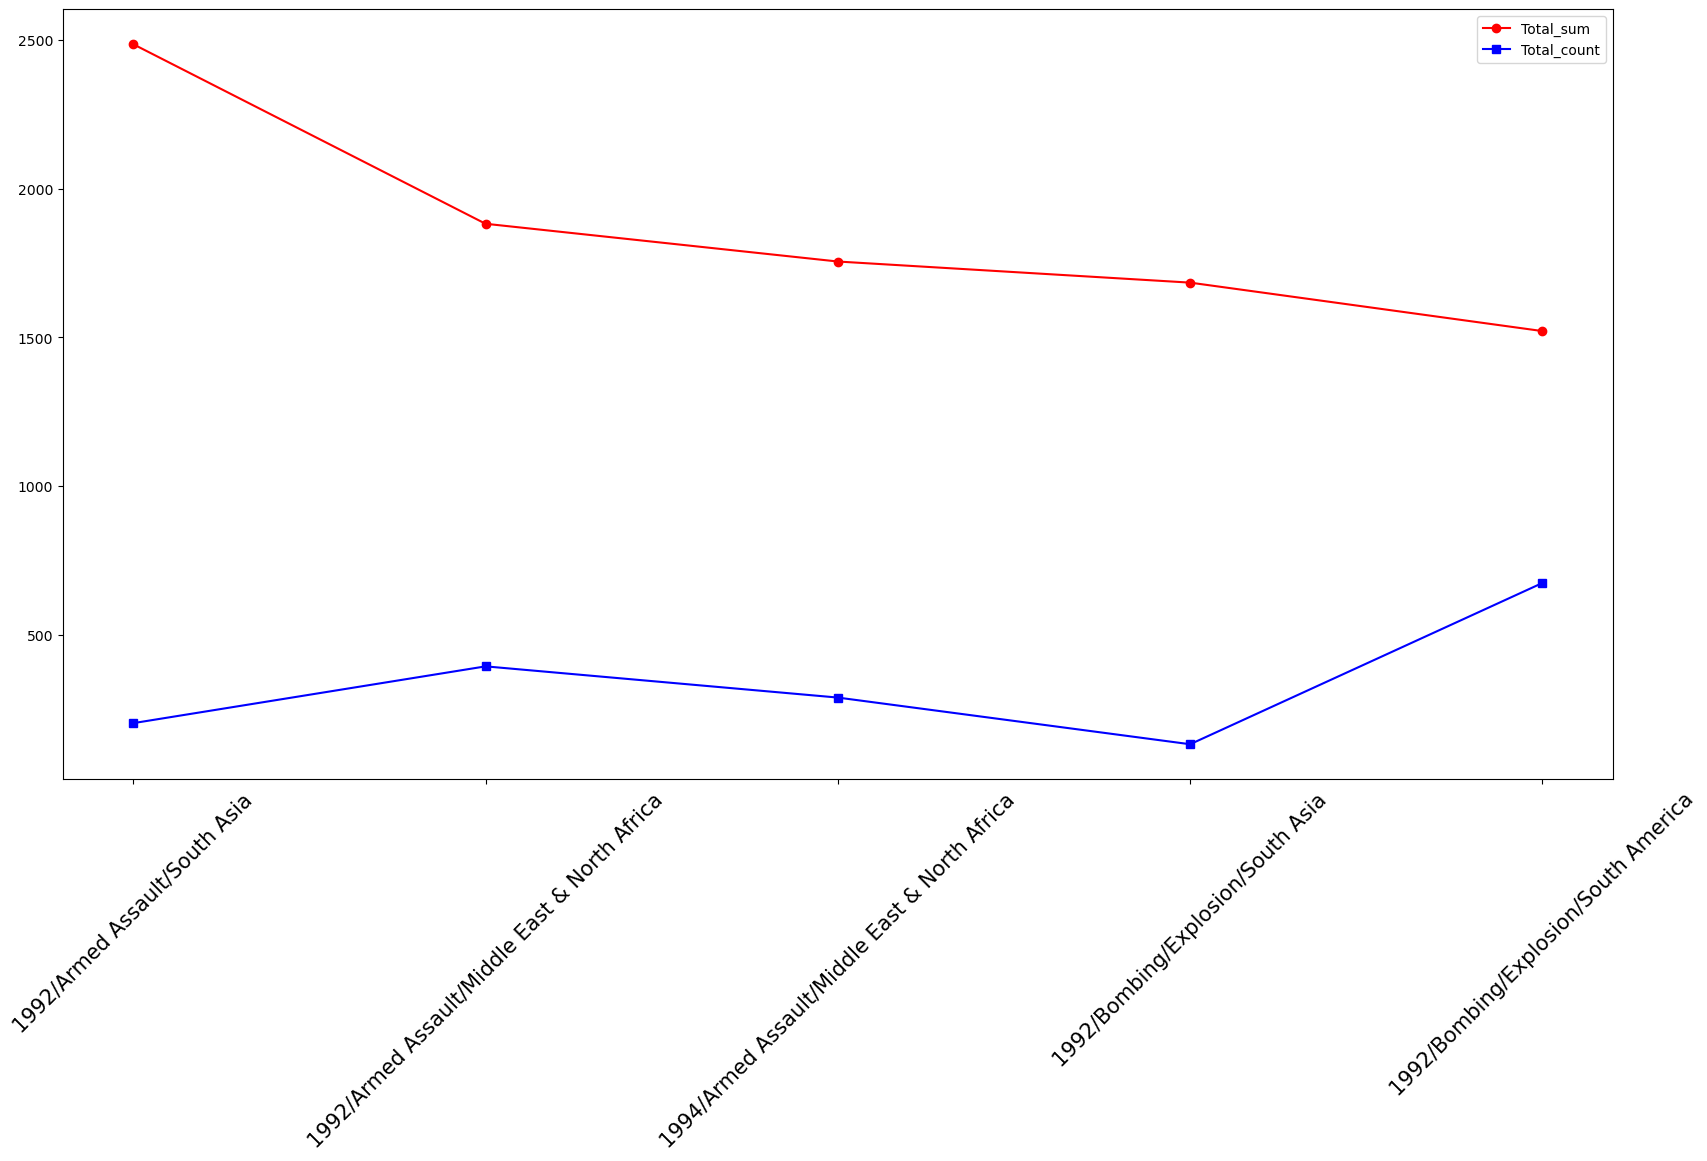

In [68]:
plt.figure(figsize=(20,10))
plt.plot(df_5_1["Year_Type_Region"], df_5_1["Total_sum"], label = "Total_sum", color="r", marker="o")
plt.plot(df_5_1["Year_Type_Region"], df_5_1["Total_count"], label = "Total_count", color="b", marker="s")
plt.xticks(rotation=45,fontsize=15)
plt.legend()
plt.show()

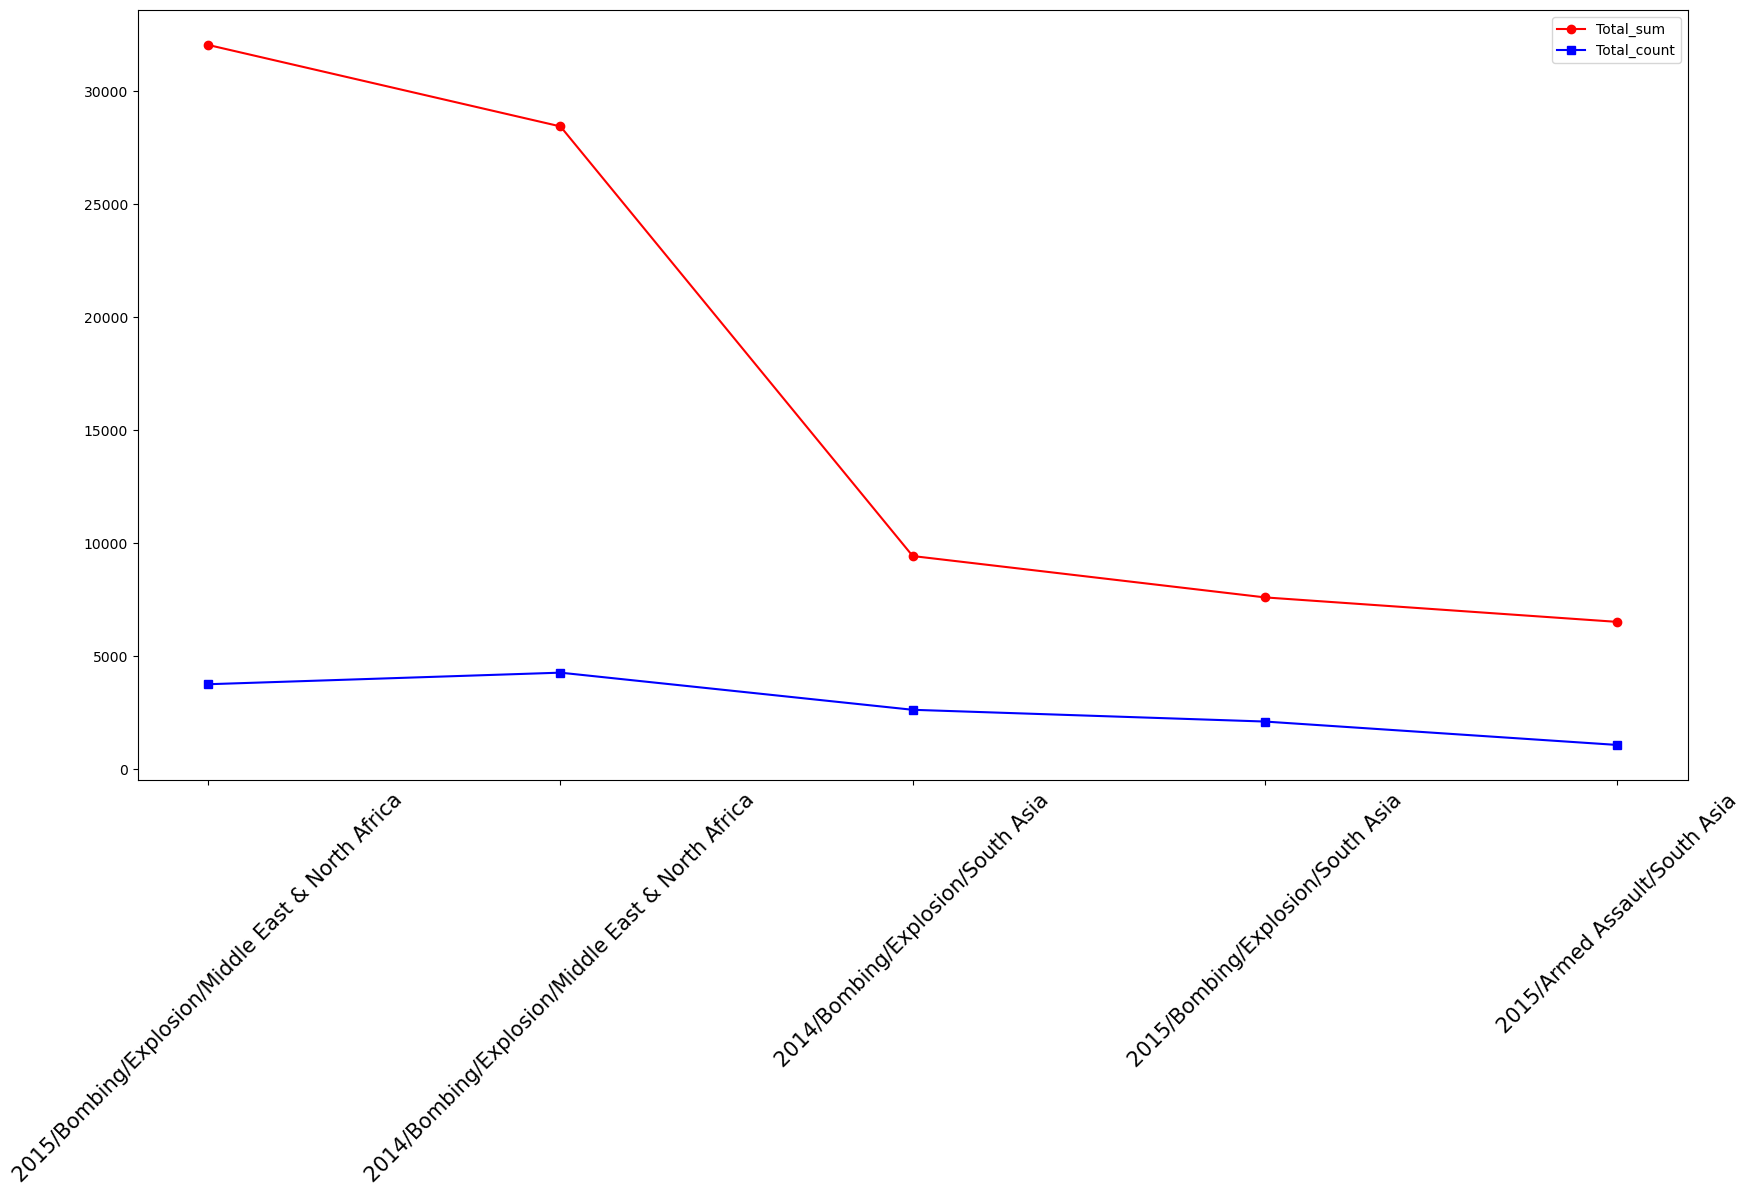

In [69]:
plt.figure(figsize=(20,10))
plt.plot(df_5_2["Year_Type_Region"], df_5_2["Total_sum"], label = "Total_sum", color="r", marker="o")
plt.plot(df_5_2["Year_Type_Region"], df_5_2["Total_count"], label = "Total_count", color="b", marker="s")
plt.xticks(rotation=45,fontsize=15)
plt.legend()
plt.show()

## 연도_지역_테러 형태별 사상자(사망자+부상자)에 대한 합계 및 테러 발생 빈도 분석
- 1992, 1994년 두 연도를 기준 분석 결과 1992년 무장테러로 인해 남아시아에서 테러 빈도는 적으나, 사상자 수가 많은 것으로 보아 사회적으로 큰 테러 발생 가능성 존재
- 2014, 2015년 두 연도를 기준 분석 결과 2015년 및 2014년 폭탄테러로 인해 중동&남아프리카에서 테러 빈도는 적으나, 많은 사상자가 발생한 것으로 보아 큰 테러 발생 가능성 존재

# 6번 문제

In [70]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [71]:
df_6 = df[["iyear", "region_txt", "attacktype1_txt", "nkill", "nwound"]]
df_6 = df_6.rename(columns={"iyear":"Year","region_txt" : "Region", "attacktype1_txt" : "Type", "nkill" : "Killed", "nwound" : "Wounded"})
df_6

,Year,Region,Type,Killed,Wounded
0,1970,Central America & Caribbean,Assassination,1.0,0.0
1,1970,North America,Hostage Taking (Kidnapping),0.0,0.0
2,1970,Southeast Asia,Assassination,1.0,0.0
3,1970,Western Europe,Bombing/Explosion,NaN,NaN
4,1970,East Asia,Facility/Infrastructure Attack,NaN,NaN
...,...,...,...,...,...
181686,2017,Sub-Saharan Africa,Armed Assault,1.0,2.0
181687,2017,Middle East & North Africa,Bombing/Explosion,2.0,7.0
181688,2017,Southeast Asia,Facility/Infrastructure Attack,0.0,0.0
181689,2017,South Asia,Bombing/Explosion,0.0,0.0


In [72]:
df_6_70 = df_6.loc[ (df_6["Year"] >=1970) & (df_6["Year"] <=1980)]
df_6_80 = df_6.loc[ (df_6["Year"] >=1980) & (df_6["Year"] <=1990)]
df_6_90 = df_6.loc[ (df_6["Year"] >=1990) & (df_6["Year"] <=2000)]
df_6_00 = df_6.loc[ (df_6["Year"] >=2000) & (df_6["Year"] <=2010)]
df_6_10 = df_6.loc[ (df_6["Year"] >=2010)]

In [73]:
df_6_70 = df_6_70.groupby("Type").agg({"Killed":["count", "sum"], "Wounded":["count","sum"]})
df_6_70["Total_count"] = (df_6_70[("Killed", "count")] + df_6_70[("Wounded", "count")]) / 2
df_6_70["Total_sum"] = df_6_70[("Killed", "sum")] + df_6_70[("Wounded", "sum")]
df_6_70["avg Total"] = df_6_70["Total_sum"] / df_6_70["Total_count"]
df_6_70 = df_6_70.reset_index()
df_6_70

Type Killed         Wounded          \
                                        count     sum   count     sum   
0                        Armed Assault   1713  4150.0    1498  1581.0   
1                        Assassination   2601  2689.0    1816   695.0   
2                    Bombing/Explosion   4539  2945.0    4242  8688.0   
3       Facility/Infrastructure Attack   1028   526.0    1027   246.0   
4                            Hijacking     73   175.0      67    51.0   
5  Hostage Taking (Barricade Incident)    198   206.0     193   265.0   
6          Hostage Taking (Kidnapping)    467   303.0     438    50.0   
7                      Unarmed Assault     26    16.0      22    10.0   
8                              Unknown    273   518.0     264   119.0   

  Total_count Total_sum avg Total  
                                   
0      1605.5    5731.0  3.569604  
1      2208.5    3384.0  1.532262  
2      4390.5   11633.0  2.649584  
3      1027.5     772.0  0.751338  
4        70.0     226.0  3.228571  
5       195.5     471.0  2.409207  
6       452.5     353.0  0.780110  
7        24.0      26.0  1.083333  
8       268.5     637.0  2.372439

In [74]:
df_6_80 = df_6_80.groupby("Type").agg({"Killed":["count", "sum"], "Wounded":["count","sum"]})
df_6_80["Total_count"] = (df_6_80[("Killed", "count")] + df_6_80[("Wounded", "count")]) / 2
df_6_80["Total_sum"] = df_6_80[("Killed", "sum")] + df_6_80[("Wounded", "sum")]
df_6_80["avg Total"] = df_6_80["Total_sum"] / df_6_80["Total_count"]
df_6_80 = df_6_80.reset_index()
df_6_80

Type Killed          Wounded           \
                                        count      sum   count      sum   
0                        Armed Assault   7158  45108.0    6966  11928.0   
1                        Assassination   6008   8258.0    5783   2119.0   
2                    Bombing/Explosion  13641  15375.0   13565  37274.0   
3       Facility/Infrastructure Attack   1481    661.0    1475    444.0   
4                            Hijacking    115    247.0     113    260.0   
5  Hostage Taking (Barricade Incident)    285    298.0     275    296.0   
6          Hostage Taking (Kidnapping)    968   1090.0     960    135.0   
7                      Unarmed Assault     50     78.0      45   1213.0   
8                              Unknown    859   4226.0     845   1339.0   

  Total_count Total_sum  avg Total  
                                    
0      7062.0   57036.0   8.076466  
1      5895.5   10377.0   1.760156  
2     13603.0   52649.0   3.870396  
3      1478.0    1105.0   0.747632  
4       114.0     507.0   4.447368  
5       280.0     594.0   2.121429  
6       964.0    1225.0   1.270747  
7        47.5    1291.0  27.178947  
8       852.0    5565.0   6.531690

In [75]:
df_6_90 = df_6_90.groupby("Type").agg({"Killed":["count", "sum"], "Wounded":["count","sum"]})
df_6_90["Total_count"] = (df_6_90[("Killed", "count")] + df_6_90[("Wounded", "count")]) / 2
df_6_90["Total_sum"] = df_6_90[("Killed", "sum")] + df_6_90[("Wounded", "sum")]
df_6_90["avg Total"] = df_6_90["Total_sum"] / df_6_90["Total_count"]
df_6_90 = df_6_90.reset_index()
df_6_90

Type Killed          Wounded           \
                                        count      sum   count      sum   
0                        Armed Assault   7509  37278.0    7318  19784.0   
1                        Assassination   5288   7403.0    5122   2941.0   
2                    Bombing/Explosion  11538  14485.0   11468  48536.0   
3       Facility/Infrastructure Attack   2101    514.0    2101    875.0   
4                            Hijacking    172     60.0     173     50.0   
5  Hostage Taking (Barricade Incident)    127    472.0     126     50.0   
6          Hostage Taking (Kidnapping)   1546   1625.0    1529    415.0   
7                      Unarmed Assault    356    537.0     347   7761.0   
8                              Unknown   1419   7112.0    1398   4343.0   

  Total_count Total_sum  avg Total  
                                    
0      7413.5   57062.0   7.697039  
1      5205.0   10344.0   1.987320  
2     11503.0   63021.0   5.478658  
3      2101.0    1389.0   0.661114  
4       172.5     110.0   0.637681  
5       126.5     522.0   4.126482  
6      1537.5    2040.0   1.326829  
7       351.5    8298.0  23.607397  
8      1408.5   11455.0   8.132765

In [76]:
df_6_00 = df_6_00.groupby("Type").agg({"Killed":["count", "sum"], "Wounded":["count","sum"]})
df_6_00["Total_count"] = (df_6_00[("Killed", "count")] + df_6_00[("Wounded", "count")]) / 2
df_6_00["Total_sum"] = df_6_00[("Killed", "sum")] + df_6_00[("Wounded", "sum")]
df_6_00["avg Total"] = df_6_00["Total_sum"] / df_6_00["Total_count"]
df_6_00 = df_6_00.reset_index()
df_6_00

Type Killed          Wounded            \
                                        count      sum   count       sum   
0                        Armed Assault   7380  25076.0    6946   15063.0   
1                        Assassination   1804   2828.0    1765    3296.0   
2                    Bombing/Explosion  15809  42041.0   15375  119622.0   
3       Facility/Infrastructure Attack   1610   1035.0    1558     934.0   
4                            Hijacking     93   3098.0      91   16522.0   
5  Hostage Taking (Barricade Incident)     43    836.0      38    1096.0   
6          Hostage Taking (Kidnapping)   1953   2419.0    1855    1292.0   
7                      Unarmed Assault    196    288.0     188     973.0   
8                              Unknown    618   3168.0     569    1354.0   

  Total_count Total_sum   avg Total  
                                     
0      7163.0   40139.0    5.603658  
1      1784.5    6124.0    3.431774  
2     15592.0  161663.0   10.368330  
3      1584.0    1969.0    1.243056  
4        92.0   19620.0  213.260870  
5        40.5    1932.0   47.703704  
6      1904.0    3711.0    1.949055  
7       192.0    1261.0    6.567708  
8       593.5    4522.0    7.619208

In [77]:
df_6_10 = df_6_10.groupby("Type").agg({"Killed":["count", "sum"], "Wounded":["count","sum"]})
df_6_10["Total_count"] = (df_6_10[("Killed", "count")] + df_6_10[("Wounded", "count")]) / 2
df_6_10["Total_sum"] = df_6_10[("Killed", "sum")] + df_6_10[("Wounded", "sum")]
df_6_10["avg Total"] = df_6_10["Total_sum"] / df_6_10["Total_count"]
df_6_10 = df_6_10.reset_index()
df_6_10

Type Killed          Wounded            \
                                        count      sum   count       sum   
0                        Armed Assault  19530  59761.0   18512   34144.0   
1                        Assassination   5486   6332.0    5421    6214.0   
2                    Bombing/Explosion  44708  89976.0   43887  182086.0   
3       Facility/Infrastructure Attack   4279   1131.0    4202    1431.0   
4                            Hijacking    194    149.0     189     125.0   
5  Hostage Taking (Barricade Incident)    312   2824.0     279    2450.0   
6          Hostage Taking (Kidnapping)   4435  19788.0    4105    4787.0   
7                      Unarmed Assault    429    198.0     376    4529.0   
8                              Unknown   3630  18343.0    3316    8072.0   

  Total_count Total_sum  avg Total  
                                    
0     19021.0   93905.0   4.936912  
1      5453.5   12546.0   2.300541  
2     44297.5  272062.0   6.141701  
3      4240.5    2562.0   0.604174  
4       191.5     274.0   1.430809  
5       295.5    5274.0  17.847716  
6      4270.0   24575.0   5.755269  
7       402.5    4727.0  11.744099  
8      3473.0   26415.0   7.605816

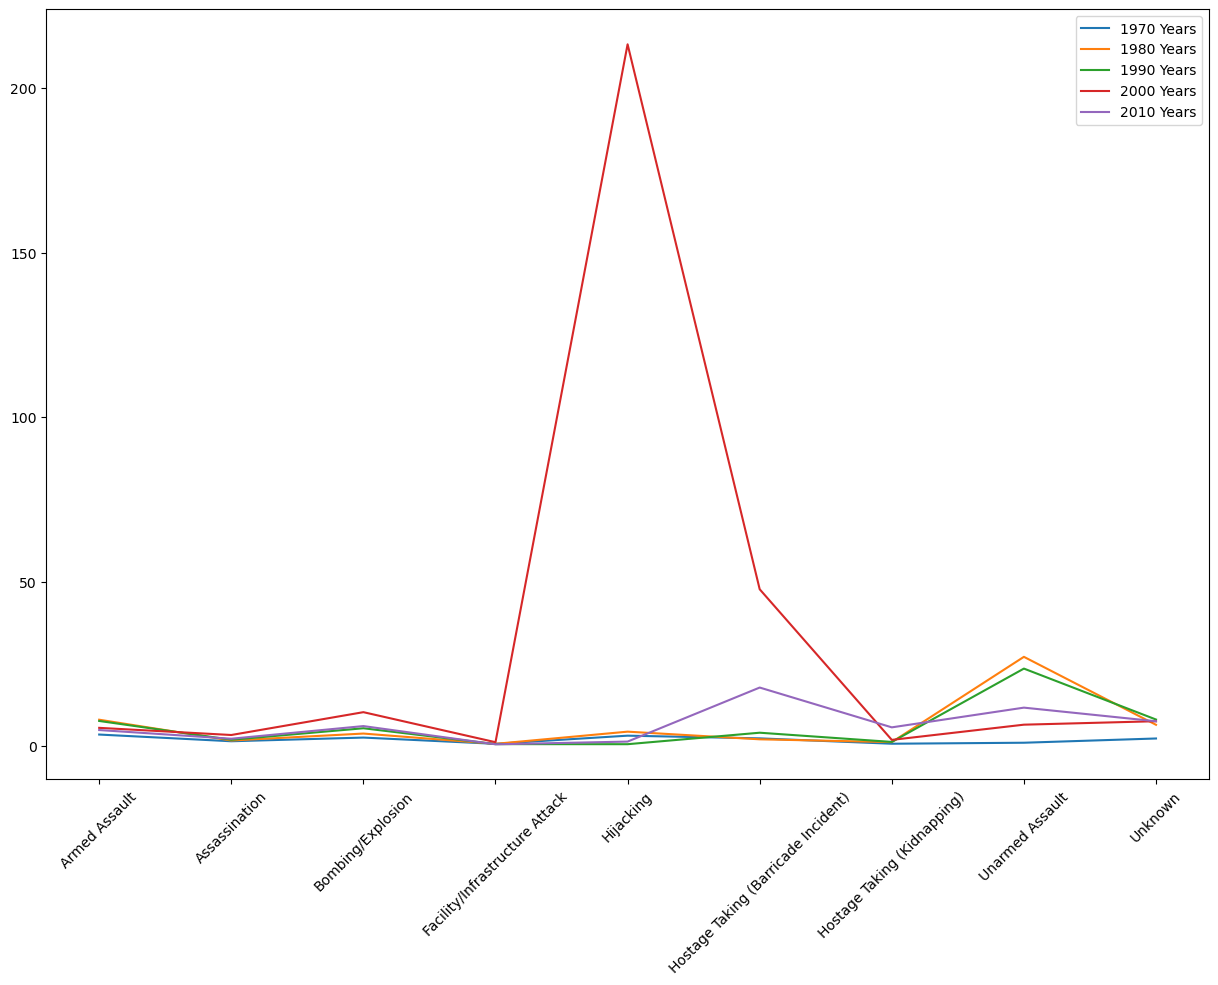

In [78]:
plt.figure(figsize=(15,10))
plt.plot("Type", "avg Total", data=df_6_70, label="1970 Years")
plt.plot("Type", "avg Total", data=df_6_80, label="1980 Years")
plt.plot("Type", "avg Total", data=df_6_90, label="1990 Years")
plt.plot("Type", "avg Total", data=df_6_00, label="2000 Years")
plt.plot("Type", "avg Total", data=df_6_10, label="2010 Years")
plt.xticks(rotation=45)
plt.legend()
plt.show()

## 10년 단위 연도 및 태러 형태별 테러 발생 빈도 대비 사상자 수
- 10년 단위로 Data를 묶고, 각 DataFrame마다 테러 형태를 기준으로 사망자, 부상자, 테러 발생 빈도, 사상자 총합 변수값 설정
- 테러 발생 빈도를 분모로, 사상자 총합을 분자로 avg Total 변수 생성
- 빈도 대비 평균 사상자 수치로 plot 그래프 시각화 결과 납치 형태 테러가 이상할 정도로 큰 수치를 나타냄
- 해당 Data 분석 시도

In [79]:
df_6.loc[ (df_6["Year"] >=2000) & (df_6["Year"] <=2010) | (df_6["Type"] == "Hijacking") ].sort_values(by=["Killed", "Wounded"], ascending = False)

,Year,Region,Type,Killed,Wounded
73126,2001,North America,Hijacking,1384.0,8190.0
73127,2001,North America,Hijacking,1383.0,8191.0
76347,2004,South Asia,Armed Assault,518.0,216.0
90401,2009,Sub-Saharan Africa,Facility/Infrastructure Attack,400.0,NaN
76953,2004,Eastern Europe,Hostage Taking (Barricade Incident),344.0,727.0
...,...,...,...,...,...
177429,2017,Sub-Saharan Africa,Hijacking,NaN,NaN
178006,2017,Southeast Asia,Hijacking,NaN,NaN
178870,2017,Middle East & North Africa,Hijacking,NaN,NaN
180102,2017,Sub-Saharan Africa,Hijacking,NaN,NaN


- 2000년도 중 2001년 Hijacking 형태 테러에서 높은 데이터 수치를 발견
- 2001년 911테러로 인한 데이터로 판단

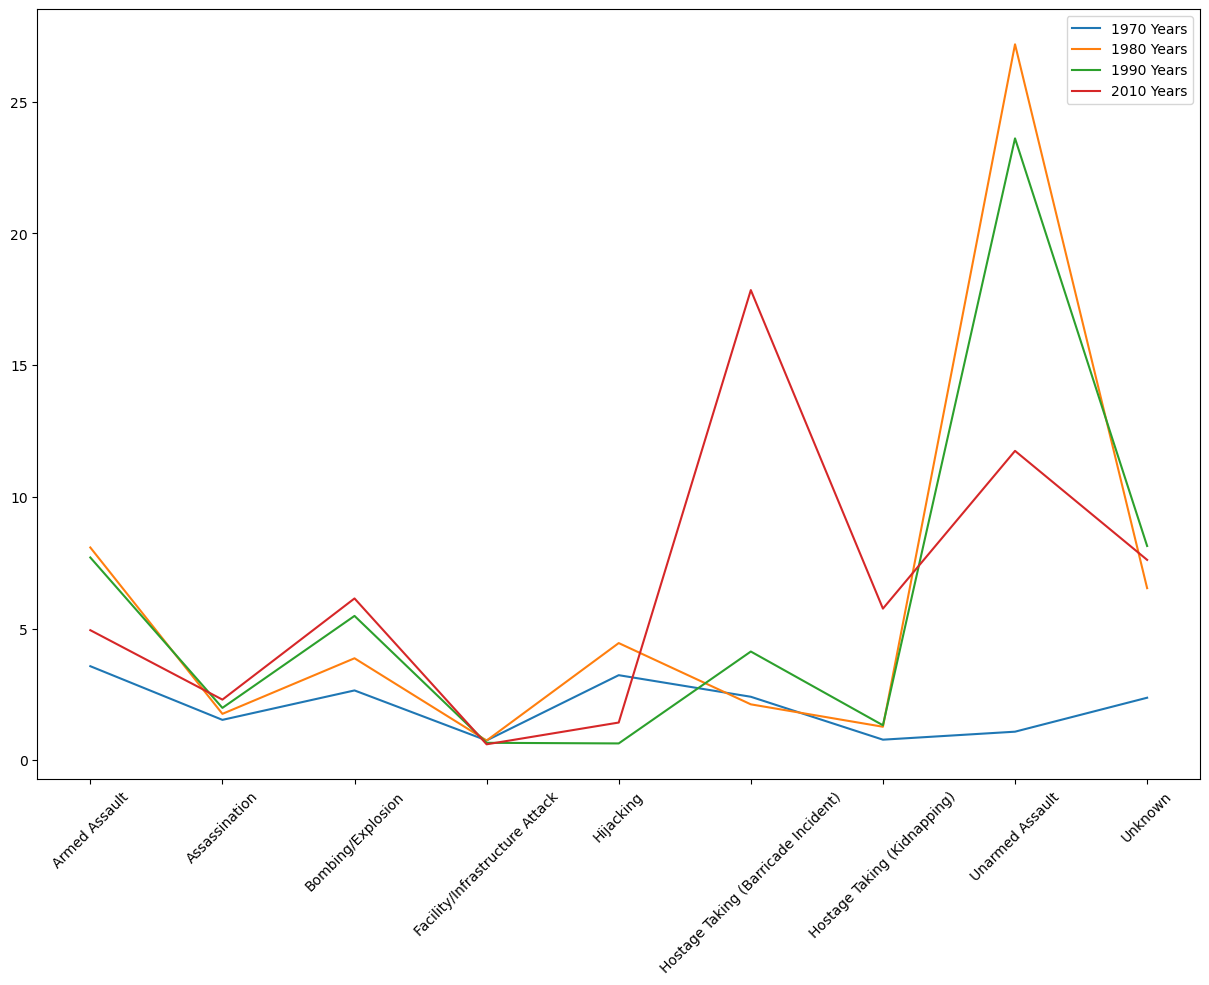

In [80]:
plt.figure(figsize=(15,10))
plt.plot("Type", "avg Total", data=df_6_70, label="1970 Years")
plt.plot("Type", "avg Total", data=df_6_80, label="1980 Years")
plt.plot("Type", "avg Total", data=df_6_90, label="1990 Years")
plt.plot("Type", "avg Total", data=df_6_10, label="2010 Years")
plt.xticks(rotation=45)
plt.legend()
plt.show()

- 10년 단위 연도별 분석결과 테러 발생 빈도 대비 사상자 수는 비무장폭력이 높은 수치를 보이며,
- 다음으로 폭탄 테러가 높은 수치를 보임

# 7번 문제

In [81]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [82]:
df_7 = df[["country_txt", "iyear", "imonth", "city", "attacktype1_txt", "nkill", "nwound"]]
df_7

,country_txt,iyear,imonth,city,attacktype1_txt,nkill,nwound
0,Dominican Republic,1970,7,Santo Domingo,Assassination,1.0,0.0
1,Mexico,1970,0,Mexico city,Hostage Taking (Kidnapping),0.0,0.0
2,Philippines,1970,1,Unknown,Assassination,1.0,0.0
3,Greece,1970,1,Athens,Bombing/Explosion,NaN,NaN
4,Japan,1970,1,Fukouka,Facility/Infrastructure Attack,NaN,NaN
...,...,...,...,...,...,...,...
181686,Somalia,2017,12,Ceelka Geelow,Armed Assault,1.0,2.0
181687,Syria,2017,12,Jableh,Bombing/Explosion,2.0,7.0
181688,Philippines,2017,12,Kubentog,Facility/Infrastructure Attack,0.0,0.0
181689,India,2017,12,Imphal,Bombing/Explosion,0.0,0.0


In [83]:
df_7 = df_7.rename(columns={"country_txt":"Country","iyear" : "Year", "imonth" : "Month", "city" : "City", "attacktype1_txt":"Type", "nkill" : "Killed", "nwound":"Wounded"})
df_7

,Country,Year,Month,City,Type,Killed,Wounded
0,Dominican Republic,1970,7,Santo Domingo,Assassination,1.0,0.0
1,Mexico,1970,0,Mexico city,Hostage Taking (Kidnapping),0.0,0.0
2,Philippines,1970,1,Unknown,Assassination,1.0,0.0
3,Greece,1970,1,Athens,Bombing/Explosion,NaN,NaN
4,Japan,1970,1,Fukouka,Facility/Infrastructure Attack,NaN,NaN
...,...,...,...,...,...,...,...
181686,Somalia,2017,12,Ceelka Geelow,Armed Assault,1.0,2.0
181687,Syria,2017,12,Jableh,Bombing/Explosion,2.0,7.0
181688,Philippines,2017,12,Kubentog,Facility/Infrastructure Attack,0.0,0.0
181689,India,2017,12,Imphal,Bombing/Explosion,0.0,0.0


In [84]:
df_7 = df_7.loc[df_7["Country"] == "South Korea"]
df_7

,Country,Year,Month,City,Type,Killed,Wounded
2514,South Korea,1974,8,Seoul,Assassination,1.0,0.0
15734,South Korea,1982,3,Busan,Facility/Infrastructure Attack,1.0,3.0
19820,South Korea,1983,9,Daegu,Bombing/Explosion,1.0,4.0
29151,South Korea,1986,9,Gimpo International Airport,Bombing/Explosion,5.0,19.0
29696,South Korea,1986,12,Busan,Armed Assault,0.0,11.0
33678,South Korea,1988,3,Busan,Bombing/Explosion,0.0,0.0
33835,South Korea,1988,3,Seoul,Facility/Infrastructure Attack,0.0,0.0
34532,South Korea,1988,5,Gwangju,Facility/Infrastructure Attack,0.0,0.0
34562,South Korea,1988,5,Seoul,Facility/Infrastructure Attack,0.0,0.0
34737,South Korea,1988,6,Daegu,Facility/Infrastructure Attack,0.0,0.0


In [85]:
df_7 = df_7.groupby(["Year", "Month", "City", "Type"]).agg({"Killed" : "sum", "Wounded" : "sum"})
df_7

Killed  \
Year Month City                        Type                                     
1974 8     Seoul                       Assassination                      1.0   
1982 3     Busan                       Facility/Infrastructure Attack     1.0   
1983 9     Daegu                       Bombing/Explosion                  1.0   
1986 9     Gimpo International Airport Bombing/Explosion                  5.0   
     12    Busan                       Armed Assault                      0.0   
1988 3     Busan                       Bombing/Explosion                  0.0   
           Seoul                       Facility/Infrastructure Attack     0.0   
     5     Gwangju                     Facility/Infrastructure Attack     0.0   
           Seoul                       Facility/Infrastructure Attack     0.0   
     6     Daegu                       Facility/Infrastructure Attack     0.0   
     7     Seoul                       Bombing/Explosion                  0.0   
     9     Seoul                       Facility/Infrastructure Attack     0.0   
     10    Gwangju                     Facility/Infrastructure Attack     0.0   
1989 5     Pyeongtaek                  Unknown                            0.0   
1990 4     Seoul                       Facility/Infrastructure Attack     0.0   
     5     Seoul                       Facility/Infrastructure Attack     0.0   
                                       Unknown                            0.0   
1991 4     Incheon                     Unknown                            0.0   
     5     Seoul                       Unarmed Assault                    0.0   
     6     Gwangju                     Facility/Infrastructure Attack     0.0   
     7     Gwangju                     Facility/Infrastructure Attack     0.0   
     11    Gwangju                     Hostage Taking (Kidnapping)        0.0   
           Seoul                       Facility/Infrastructure Attack     0.0   
1992 5     Muan-gun                    Facility/Infrastructure Attack     0.0   
     8     Uijeongbu                   Assassination                      1.0   
     9     Incheon                     Hostage Taking (Kidnapping)        0.0   
1994 7     Seongnam                    Unknown                            0.0   
     8     Seoul                       Unarmed Assault                    1.0   
1995 1     Gwangju                     Unknown                            0.0   
     5     Incheon                     Unarmed Assault                    0.0   
     6     Seoul                       Armed Assault                      0.0   
     10    Seoul                       Unknown                            0.0   
1996 8     Seoul                       Unarmed Assault                    0.0   
2001 2     Daegu                       Bombing/Explosion                  0.0   
2003 11    Buan                        Armed Assault                      0.0   
2006 5     Seoul                       Armed Assault                      0.0   
2015 3     Seoul                       Assassination                      0.0   
2016 12    Gumi                        Facility/Infrastructure Attack     0.0   

                                                                       Wounded  
Year Month City                        Type                                     
1974 8     Seoul                       Assassination                       0.0  
1982 3     Busan                       Facility/Infrastructure Attack      3.0  
1983 9     Daegu                       Bombing/Explosion                   4.0  
1986 9     Gimpo International Airport Bombing/Explosion                  19.0  
     12    Busan                       Armed Assault                      11.0  
1988 3     Busan                       Bombing/Explosion                   0.0  
           Seoul                       Facility/Infrastructure Attack      0.0  
     5     Gwangju                     Facility/Infrastructure Attack      0.0  
           Seoul    

In [86]:
df_7["Total"] = df_7["Killed"] + df_7["Wounded"]
df_7 = df_7.sort_values(by="Total", ascending=False).head()
df_7

Killed  Wounded  \
Year Month City                        Type                                 
2003 11    Buan                        Armed Assault         0.0     60.0   
1996 8     Seoul                       Unarmed Assault       0.0     30.0   
1986 9     Gimpo International Airport Bombing/Explosion     5.0     19.0   
     12    Busan                       Armed Assault         0.0     11.0   
1983 9     Daegu                       Bombing/Explosion     1.0      4.0   

                                                          Total  
Year Month City                        Type                      
2003 11    Buan                        Armed Assault       60.0  
1996 8     Seoul                       Unarmed Assault     30.0  
1986 9     Gimpo International Airport Bombing/Explosion   24.0  
     12    Busan                       Armed Assault       11.0  
1983 9     Daegu                       Bombing/Explosion    5.0

## 대한민국 주요 테러 사건 분석 결과
- 1. 1983년 9월 대구 미국문화원에서 북한의 대남 도발 사건으로 폭발 테러가 일어났으며, 당시 지나가던 민간인도 부상을 입음
- 2. 1986년 12월 부산에서 일어난 테러 사건은 자세한 정보가 부재
- 3. 1896년 9월 김포 국제공항에서 일너난 폭탄 테러로 자세한 내막은 밝혀지지 않았지만, 서울 아시안 게임 개막을 앞두고 북한측의 도발이라고 가정
- 4. Data에는 1996년 8월로 되어 있으나, 1996년 9월에 발생한 강릉 무장공비 사건이 아닐 것이라는 추축
- 5. 2003년 11월 부산에서 발생한 Data도 또한 자세한 자료가 없음

# 8번 문제

In [87]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [88]:
df_8 = df[["iyear", "imonth", "iday", "nkill", 'nwound',"targtype1_txt"]]
df_8 = df_8.rename(columns={"iyear":"Year", "imonth":"Month", "iday":"Day", "nkill" : "Killed", "nwound":"Wounded", "targtype1_txt":"Target"})
df_8

,Year,Month,Day,Killed,Wounded,Target
0,1970,7,2,1.0,0.0,Private Citizens & Property
1,1970,0,0,0.0,0.0,Government (Diplomatic)
2,1970,1,0,1.0,0.0,Journalists & Media
3,1970,1,0,NaN,NaN,Government (Diplomatic)
4,1970,1,0,NaN,NaN,Government (Diplomatic)
...,...,...,...,...,...,...
181686,2017,12,31,1.0,2.0,Military
181687,2017,12,31,2.0,7.0,Military
181688,2017,12,31,0.0,0.0,Private Citizens & Property
181689,2017,12,31,0.0,0.0,Government (General)


In [89]:
df_8["Target"].unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

In [90]:
len(df_8["Target"].unique())

22

In [91]:
df_8_City = df_8.loc[  
    (df_8["Target"] == "Private Citizens & Property") |
    (df_8["Target"] == "Journalists & Media") |
    (df_8["Target"] == "Airports & Aircraft") |
    (df_8["Target"] == "Business") |
    (df_8["Target"] == "Transportation") |
    (df_8["Target"] == "Tourists") |
    (df_8["Target"] == "Food or Water Supply")]
df_8_City

,Year,Month,Day,Killed,Wounded,Target
0,1970,7,2,1.0,0.0,Private Citizens & Property
2,1970,1,0,1.0,0.0,Journalists & Media
12,1970,1,8,0.0,0.0,Airports & Aircraft
14,1970,1,9,0.0,0.0,Business
18,1970,1,12,0.0,0.0,Business
...,...,...,...,...,...,...
181677,2017,12,31,0.0,0.0,Private Citizens & Property
181678,2017,12,30,1.0,1.0,Business
181682,2017,12,31,0.0,0.0,Private Citizens & Property
181685,2017,12,31,0.0,4.0,Business


In [92]:
df_8_City = df_8_City.groupby("Year").agg({"Killed" : ("count","sum"), "Wounded" : ("count", "sum")})
df_8_City

Killed          Wounded         
      count      sum   count      sum
Year                                 
1970    217    116.0     209     96.0
1971    158     72.0     136     12.0
1972    238    339.0     108    330.0
1973    204    202.0     115    161.0
1974    314    381.0     208    580.0
1975    309    295.0     187    549.0
1976    402    386.0     274    495.0
1977    687    268.0     651    345.0
1978    635    806.0     616    883.0
1979   1036    878.0    1005   1446.0
1980   1034   1522.0    1009   2054.0
1981    774   1448.0     758   1419.0
1982    709   1611.0     673   2013.0
1983    764   2480.0     729   1742.0
1984   1192   3844.0    1177   3182.0
1985    941   2524.0     925   3040.0
1986   1147   2414.0    1122   3203.0
1987   1301   2723.0    1284   3349.0
1988   1423   3305.0    1419   3266.0
1989   1761   3617.0    1763   2517.0
1990   1632   3347.0    1632   2960.0
1991   1935   3105.0    1938   3200.0
1992   2259   4287.0    2252   5200.0
1994   1570   3988.0    1545   3383.0
1995   1578   2954.0    1563   9809.0
1996   1410   4635.0    1370   6866.0
1997   1593   7658.0    1546   5636.0
1998    484   2411.0     428   2767.0
1999    658   1978.0     629   3437.0
2000    887   2496.0     833   2965.0
2001   1042   5879.0     988  20487.0
2002    690   2874.0     650   4639.0
2003    500   1584.0     459   3483.0
2004    436   1968.0     410   5278.0
2005    713   2824.0     670   6447.0
2006   1243   5553.0    1192   9747.0
2007   1399   6818.0    1323  12784.0
2008   2410   4876.0    2353  10747.0
2009   2516   4865.0    2487  11137.0
2010   2315   3978.0    2305   9206.0
2011   2223   3793.0    2196   7449.0
2012   2579   4728.0    2538   9932.0
2013   3741   8029.0    3653  16953.0
2014   5680  19703.0    5259  19550.0
2015   5538  15802.0    5211  22545.0
2016   5304  15789.0    5109  22670.0
2017   3745   9093.0    3596  10721.0

In [93]:
df_8_Total = df_8.groupby("Year").agg({"Killed" : ("count","sum"), "Wounded" : ("count", "sum")})
df_8_Total

Killed          Wounded         
      count      sum   count      sum
Year                                 
1970    609    174.0     599    212.0
1971    407    173.0     326     82.0
1972    524    566.0     241    409.0
1973    424    370.0     244    495.0
1974    523    539.0     352    865.0
1975    587    617.0     400    617.0
1976    814    674.0     620    756.0
1977   1189    456.0    1104    518.0
1978   1373   1459.0    1331   1600.0
1979   2257   2100.0    2200   2506.0
1980   2211   4400.0    2150   3645.0
1981   1928   4851.0    1883   3337.0
1982   1742   5136.0    1666   3342.0
1983   1974   9444.0    1829   4047.0
1984   2805  10450.0    2775   5291.0
1985   2475   7094.0    2429   5130.0
1986   2481   4976.0    2427   5814.0
1987   3089   6482.0    3039   5775.0
1988   3689   7208.0    3672   6960.0
1989   4290   8152.0    4290   5539.0
1990   3881   7148.0    3867   6128.0
1991   4579   8429.0    4587   7591.0
1992   5048   9742.0    5036   9915.0
1994   3368   7690.0    3337   7569.0
1995   3076   6103.0    3060  14292.0
1996   3001   6966.0    2948  10795.0
1997   3130  10924.0    3016   9072.0
1998    871   4688.0     791   8183.0
1999   1345   3393.0    1286   5341.0
2000   1757   4403.0    1654   5869.0
2001   1885   7729.0    1798  22774.0
2002   1321   4805.0    1247   7162.0
2003   1258   3317.0    1175   7384.0
2004   1151   5743.0    1050  12022.0
2005   1999   6331.0    1871  12784.0
2006   2673   9380.0    2545  15550.0
2007   3198  12824.0    2993  22524.0
2008   4740   9157.0    4629  18998.0
2009   4703   9273.0    4626  19138.0
2010   4821   7827.0    4797  15947.0
2011   5048   8246.0    4976  14659.0
2012   8314  15497.0    8165  25445.0
2013  11685  22273.0   11454  37688.0
2014  15881  44490.0   15036  41128.0
2015  14160  38853.0   13481  44043.0
2016  12809  34871.0   12437  40001.0
2017  10285  26445.0    9941  24927.0

In [94]:
len(df_8_City), len(df_8_Total)

(47, 47)

In [96]:
df_8_diff = pd.DataFrame(index=df_8_City.index, columns={"cityTerror" : df_8_City[("Killed", "sum")], "TotalTerror":df_8_Total[("Killed", "sum")]})

In [97]:
df_8_diff[("cityTerror")] = df_8_City[("Killed", "sum")] + df_8_City[("Wounded", "sum")]
df_8_diff[("TotalTerror")] = df_8_Total[("Killed", "sum")] + df_8_Total[("Wounded", "sum")]

In [98]:
df_8_diff[("rate")] = (df_8_diff[("cityTerror")] / df_8_diff[("TotalTerror")]) * 100

In [99]:
df_8_diff

,cityTerror,TotalTerror,rate
Year,,,
1970,212.0,386.0,54.922280
1971,84.0,255.0,32.941176
1972,669.0,975.0,68.615385
1973,363.0,865.0,41.965318
1974,961.0,1404.0,68.447293
1975,844.0,1234.0,68.395462
1976,881.0,1430.0,61.608392
1977,613.0,974.0,62.936345
1978,1689.0,3059.0,55.214122


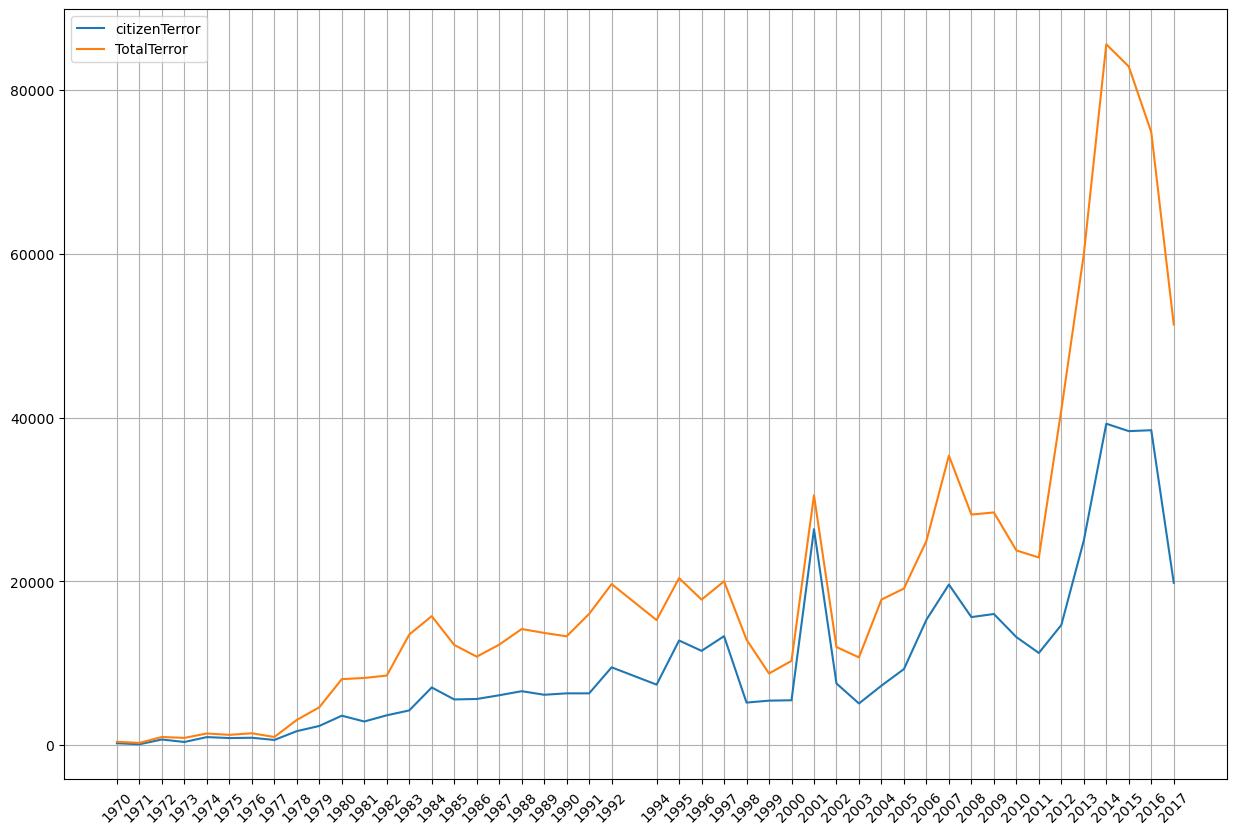

In [100]:
plt.figure(figsize=(15,10))
plt.plot(df_8_diff.index, df_8_diff["cityTerror"], label = "citizenTerror")
plt.plot(df_8_diff.index, df_8_diff["TotalTerror"], label = "TotalTerror")
plt.xticks(df_8_diff.index, rotation = 45)
plt.legend()
plt.grid()
plt.show()

Text(0.5, 1.0, 'citizenTerror Rate')

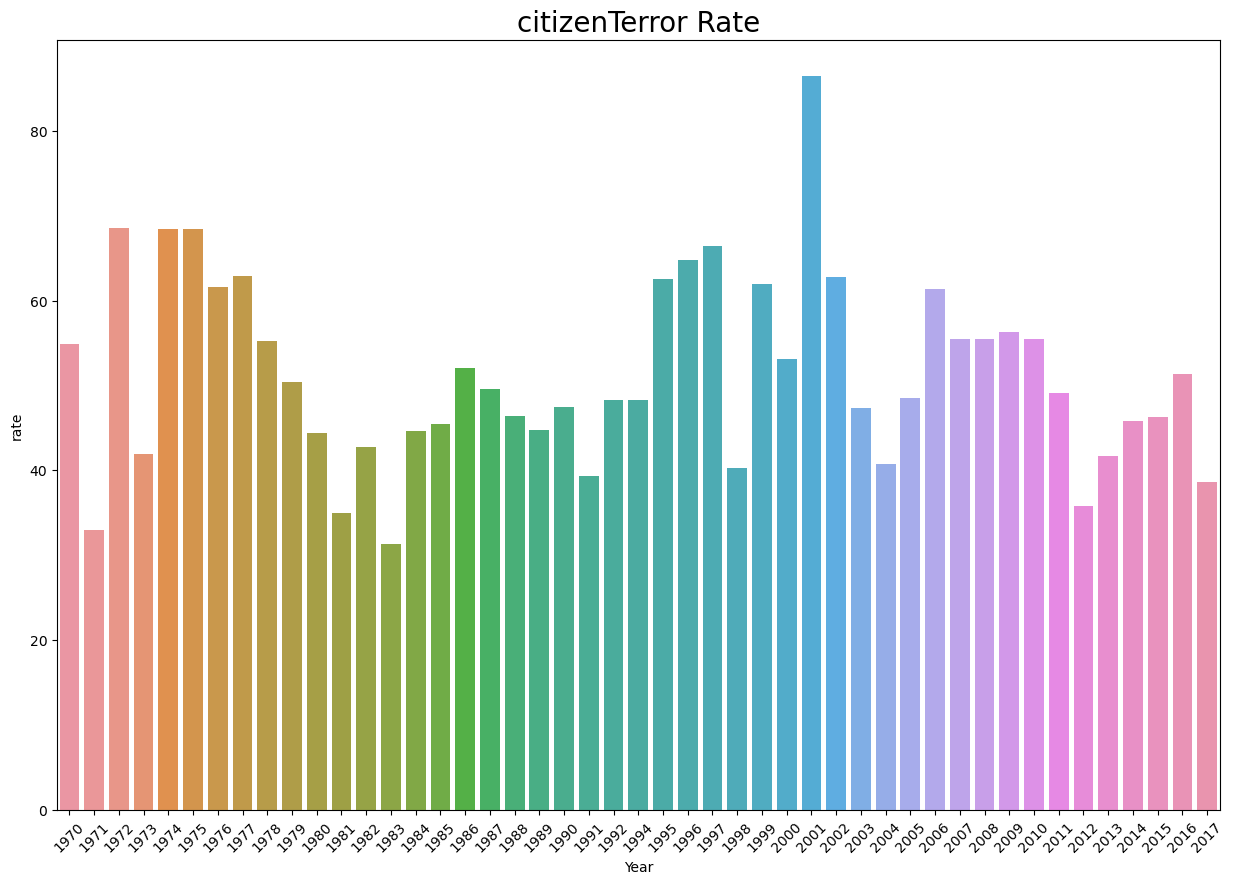

In [101]:
plt.figure(figsize=(15,10))
sns.barplot(x=df_8_diff.index, y="rate", data=df_8_diff)
plt.xticks(rotation=45)
plt.title("citizenTerror Rate", size=20)

In [102]:
df_8_diff["cityTerror"].sum(),df_8_diff["TotalTerror"].sum()

(464926.0, 935737.0)

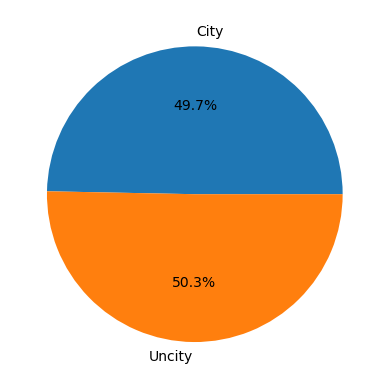

In [103]:
plt.pie([df_8_diff["cityTerror"].sum(),df_8_diff["TotalTerror"].sum()-df_8_diff["cityTerror"].sum()], labels=["City", "Uncity"], autopct='%.1f%%')
plt.show()

## 민간인에 대한 테러
- 1차 직선 그래프에 시각화를 바탕으로 분석한 결과 : 1977년까지는 테러의 사상자 민간인 사상자가 대부분을 차지하며, 이후 테러 사상자 중 일정 부분을 차지함. 또한, 테러의 사상자가 늘어날수록 함께 사상자의 수가 늘어남
- % bar 그래프 : 911테러가 발생한 2001년의 경우 민간인에 대한 사상자가 전체 테러 사상자 중 86%까지 올라가며, 전체적으로 30% 이상 차지하며 높은 경우 50%보다 높음
- pie 그래프 : 전체 테러 사상자 중 민간인 사상자와 비민간인 사상자의 수가 거의 비슷함

## 8번의 결론
- 테러의 원인은 많지만, 그 결과가 민간인에게 영향을 미친다면 더욱 큰 악이라고 생각합니다. 이러한 민간인에 대한 테러가 현재도 발생하고 있으며, 역사적인 데이터를 분석 결과 절반에 가까운 사상자가 민간에서 발생했습니다. 
- 우리나라의 경우 독립을 위해 폭탄, 암살 등 많은 폭력적인 행동을 하셨지만, 그 행동이 광복을 위해 행동해서 테러가 아닌 것이 아니라, 민간인이 아닌 군인, 즉 적대적인 국가의 군인을 대상으로 한 전쟁을 위한 행위였기에 폭력에 의한 행동이지만, 테러가 아니라고 생각합니다.
- 그렇기에 가장 근본적으로 테러가 없어야겠지만, 민간인에 대한 테러가 우선적으로 지양되고 데이터 분석으로도 수치가 감소되야합니다.